In [1]:
# need: data folder containing the following files:
#      ReutersNews106521 data set
#      google trends data (lehmanBrothersData.csv, morganStanleyData.csv, goldmanSachsData.csv, )
#      financialdata folder (contains financial phrasebank dataset)

In [12]:
# use your rose login below

from rose_wrapper.rose import Rose
import pandas as pd
import datetime
import yfinance as yf
from pprint import pprint
import os
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize

import re
from nltk import PorterStemmer, WordNetLemmatizer, word_tokenize
from nltk.corpus import stopwords
from os import listdir
from os.path import isfile, isdir, join
import numpy as np
import numpy
import sys
import getopt
import codecs
import time
import csv
import io
import pickle

rose = Rose()
rose.login("ccriscitiello6@gmail.com", "password")

In [ ]:
****************************************************************************************************************************

In [ ]:
# basic analysis of Reuters financial news data set
# data source: https://github.com/duynht/financial-news-dataset/tree/master/ReutersNews106521

In [3]:
# looks through the Reuters data set and
# returns a list of tuples, each of the form (date, frequency), where frequency is the number of times
# the phrase is mentioned on that date.  the frequency includes capitalization and non capitalization

# phrase is a list of the words in the phrase of interest with no capitalizations
# e.g. for the phrase "Lehman Brothers", phrase = ['lehman', 'brothers']

# also, it prints the number of times the phrase is mentioned throughout the data set (tot), and it prints
# the number of articles in the data set where the phrase is mentioned at least min_threshold times

def freqReuters(phrase, min_threshold, pathname):
    phrases = generatePhrases(phrase)
    tot = 0
    countt = 0
    freq = []
    directory2 = os.fsencode(pathname)
    for folder in os.listdir(directory2):
        folname = os.fsdecode(folder)

        if not (folname == ".DS_Store"):
            directory = os.fsencode(pathname + '/' + folname)
            tot2 = 0
            for file in os.listdir(directory):
                filename = os.fsdecode(file)

                if not (filename == ".DS_Store"):
                    file = open(pathname + '/' + folname + '/' + filename).read()

                    count = 0
                    for name in phrases:
                        count = count + file.count(name)

                    if count >= min_threshold:
                        countt = countt + 1

                    tot2 = tot2 + count
                    tot = tot + count

            freq.append((datetime.datetime(year=int(folname[0:4]), month=int(folname[4:6]), day=int(folname[6:8])), tot2))
    print("number of times", phrases[0], "is mentioned throughout the data set:", tot)
    print("number of articles in the data set where", phrase[0],"is mentioned at least", min_threshold, "times:", countt)
    return sorted(freq, key=lambda x: x[0])

# a helper function which generates capitalized versions of the phrase
# e.g., for phrase = ['morgan', 'stanley '], returns [morgan stanley, 'Morgan stanley', 'Morgan Stanley']
def generatePhrases(phrase):
    string1 = ""
    for word in phrase:
        string1 = string1 + ' ' + word
        
    string2 = ""
    first = True
    for word in phrase:
        if first:
            word = word.capitalize()
            first = False
        string2 = string2 + ' ' + word
        
    string3 = ""
    for word in phrase:
        string3 = string3 + ' ' + word.capitalize()
    
    return [string1[1:len(string1)], string2[1:len(string2)], string3[1:len(string3)]]

In [4]:
# this cell takes a couple minutes to run
min_threshold = 3
pathname = './ReutersNews106521'
freq1 = freqReuters(['lehman', 'brothers'], min_threshold, pathname)
freq2 = freqReuters(['morgan', 'stanley'], min_threshold, pathname)
freq3 = freqReuters(['goldman', 'sachs'], min_threshold, pathname)

number of times lehman brothers is mentioned throughout the data set: 4315
number of articles in the data set where lehman is mentioned at least 3 times: 171
number of times morgan stanley is mentioned throughout the data set: 10669
number of articles in the data set where morgan is mentioned at least 3 times: 966
number of times goldman sachs is mentioned throughout the data set: 9467
number of articles in the data set where goldman is mentioned at least 3 times: 594


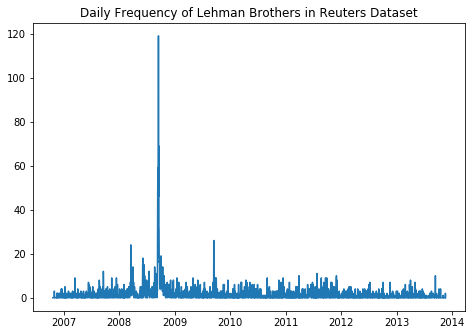

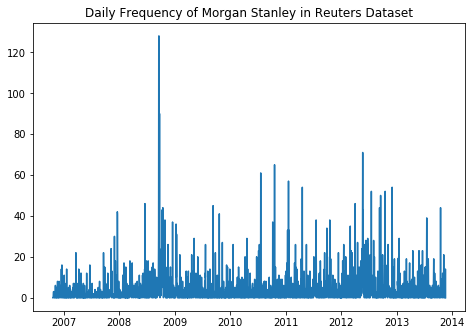

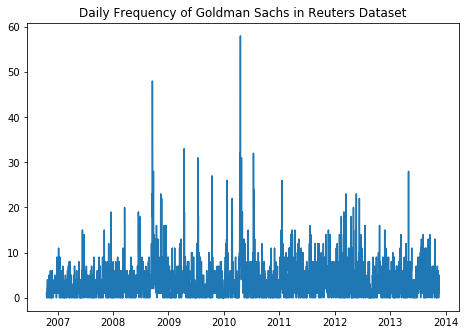

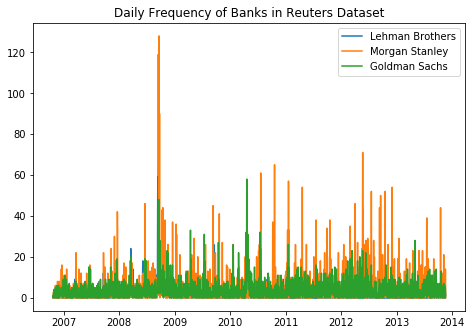

In [6]:
plt.axes([0, 0.6, 1, 1])
plt.plot(*zip(*freq1))
plt.title('Daily Frequency of Lehman Brothers in Reuters Dataset')
plt.show()

plt.axes([0, 0.6, 1, 1])
plt.plot(*zip(*freq2))
plt.title('Daily Frequency of Morgan Stanley in Reuters Dataset')
plt.show()

plt.axes([0, 0.6, 1, 1])
plt.plot(*zip(*freq3))
plt.title('Daily Frequency of Goldman Sachs in Reuters Dataset')
plt.show()

plt.axes([0, 0.6, 1, 1])
plt.plot(*zip(*freq1), *zip(*freq2), *zip(*freq3))
plt.title('Daily Frequency of Banks in Reuters Dataset')
plt.legend(['Lehman Brothers','Morgan Stanley','Goldman Sachs'])
plt.show()

In [108]:
# lag is the period of the moving average (eg 7 for weekly)
# fre is the time series data as a list of [date, number] sublists: fre = [..., [date, number], ...]
# center is a datetime.timedelta object; when center =  datetime.timedelta(days=0), the date of the frequency
# is the end of the month; when center =  datetime.timedelta(days=14), the date is centered in the middle of
# the month
def movingAvg(fre, lag, center):
    n = len(fre)
    freRet = []
    tot = 0
    for i in range(n):
        tot = tot + fre[i][1]
        if ((i%lag) == lag-1):
            freRet.append((fre[i][0] - center, tot))
            tot = 0
    return freRet

# converts list of sublists (eg [..., [date, number], ...]) to list of tuples ([..., (date, number), ...])
def convert(list): 
    return tuple(i for i in list) 

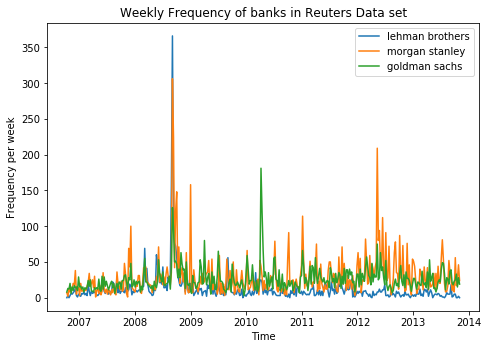

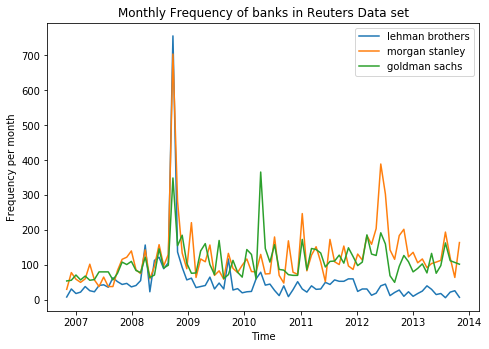

In [109]:
center = datetime.timedelta(days=14)
period1 = 7
freqq1 = movingAvg(freq1, period1, center)
freqq2 = movingAvg(freq2, period1, center)
freqq3 = movingAvg(freq3, period1, center)

plt.axes([0, 0.6, 1, 1])
plt.plot(*zip(*freqq1), *zip(*freqq2), *zip(*freqq3))
plt.title('Weekly Frequency of banks in Reuters Data set')
plt.xlabel('Time')
plt.ylabel('Frequency per week')
plt.legend(['lehman brothers', 'morgan stanley', 'goldman sachs'])
plt.show()

period2 = 30
freqq1 = movingAvg(freq1, period2, center)
freqq2 = movingAvg(freq2, period2, center)
freqq3 = movingAvg(freq3, period2, center)

plt.axes([0, 0.6, 1, 1])
plt.plot(*zip(*freqq1), *zip(*freqq2), *zip(*freqq3))
plt.title('Monthly Frequency of banks in Reuters Data set')
plt.xlabel('Time')
plt.ylabel('Frequency per month')
plt.legend(['lehman brothers', 'morgan stanley', 'goldman sachs'])
plt.show()

In [ ]:
****************************************************************************************************************************

In [ ]:
# comparing frequency in reuters to google trends data
# source: google trends
# source: https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#
# source: http://mpqa.cs.pitt.edu/corpora/mpqa_corpus/

In [9]:
# read in bank data from google trends
# eg lehmanBrothersData is a dataframe containing the google trends data for lehman brothers

lehmanBrothersData = pd.read_csv("lehmanBrothersData.csv")
lehmanBrothersData.columns = lehmanBrothersData.iloc[0]
lehmanBrothersData = lehmanBrothersData.drop(lehmanBrothersData.index[0])
lehmanBrothersData['Month']=pd.to_datetime(lehmanBrothersData.index, format="%Y-%m")
lehmanBrothersData = lehmanBrothersData.set_index('Month')
lehmanBrothersData = lehmanBrothersData[lehmanBrothersData["lehman brothers: (Worldwide)"].apply(lambda x: x.isnumeric())]

morganStanleyData = pd.read_csv("morganStanleyData.csv")
morganStanleyData.columns = morganStanleyData.iloc[0]
morganStanleyData = morganStanleyData.drop(morganStanleyData.index[0])
morganStanleyData['Month']=pd.to_datetime(morganStanleyData.index, format="%Y-%m")
morganStanleyData = morganStanleyData.set_index('Month')
morganStanleyData = morganStanleyData[morganStanleyData["morgan stanley: (Worldwide)"].apply(lambda x: x.isnumeric())]

goldmanSachsData = pd.read_csv("goldmanSachsData.csv")
goldmanSachsData.columns = goldmanSachsData.iloc[0]
goldmanSachsData = goldmanSachsData.drop(goldmanSachsData.index[0])
goldmanSachsData['Month']=pd.to_datetime(goldmanSachsData.index, format="%Y-%m")
goldmanSachsData = goldmanSachsData.set_index('Month')
goldmanSachsData = goldmanSachsData[goldmanSachsData["Goldman Sachs: (Worldwide)"].apply(lambda x: x.isnumeric())]

lehmanBrothersData.iloc[:,0] = pd.to_numeric(lehmanBrothersData.iloc[:,0])
morganStanleyData.iloc[:,0] = pd.to_numeric(morganStanleyData.iloc[:,0])
goldmanSachsData.iloc[:,0] = pd.to_numeric(goldmanSachsData.iloc[:,0])

In [10]:
# normalize frequency in Reuters dataset so that it has max value 100 (like in google trends).
normalizingFactor = 6.8 # adjust accordingly
freqq4 = [(elem1, elem2/normalizingFactor) for elem1, elem2 in freqq1]
freqq5 = [(elem1, elem2/normalizingFactor) for elem1, elem2 in freqq2]
freqq6 = [(elem1, elem2/normalizingFactor) for elem1, elem2 in freqq3]

# then convert monthly bank frequency in Reuters dataset to a dataframe
dfLehmanBrothers = pd.DataFrame(freqq4, columns =['Month', 'lehman brothers Reuters Frequency'])
dfLehmanBrothers = dfLehmanBrothers.set_index('Month')
dfMorganStanley = pd.DataFrame(freqq5, columns =['Month', 'morgan stanley Reuters Frequency'])
dfMorganStanley = dfMorganStanley.set_index('Month')
dfGoldmanSachs = pd.DataFrame(freqq6, columns =['Month', 'Goldman Sachs Reuters Frequency'])
dfGoldmanSachs = dfGoldmanSachs.set_index('Month')

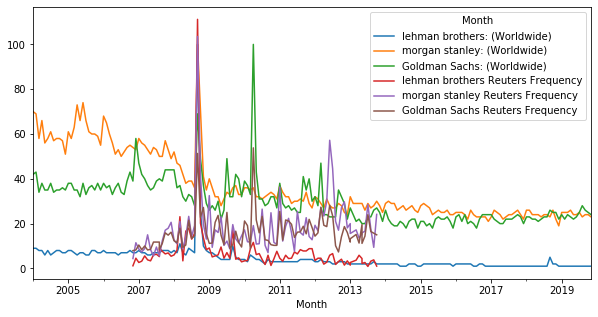

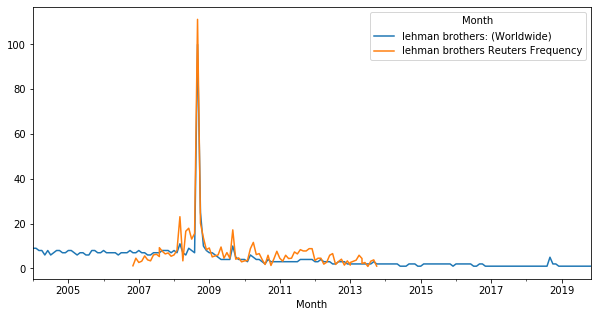

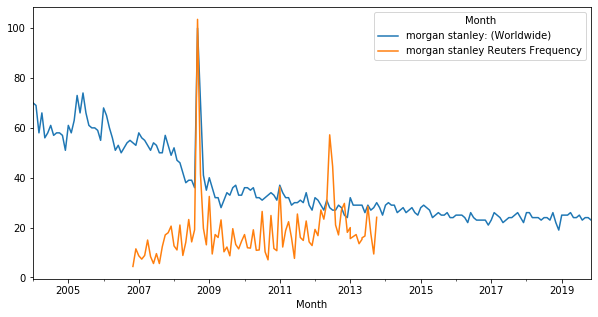

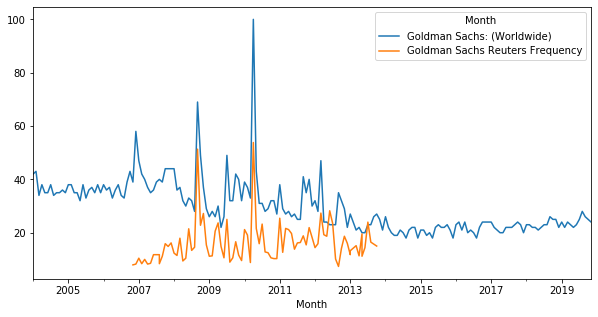

In [11]:
# in plots below, 'bank name: (Worldwide)' is the google trend data
ax = lehmanBrothersData.plot(figsize=(10,5), xlim=(datetime.datetime(2006, 1, 1), datetime.datetime(2014, 1, 1)))
morganStanleyData.plot(ax=ax)
goldmanSachsData.plot(ax=ax)
dfLehmanBrothers.plot(ax=ax)
dfMorganStanley.plot(ax=ax)
dfGoldmanSachs.plot(ax=ax)

ax = lehmanBrothersData.plot(figsize=(10,5), xlim=(datetime.datetime(2006, 1, 1), datetime.datetime(2014, 1, 1)))
dfLehmanBrothers.plot(ax=ax)

ax = morganStanleyData.plot(figsize=(10,5), xlim=(datetime.datetime(2006, 1, 1), datetime.datetime(2014, 1, 1)))
dfMorganStanley.plot(ax=ax)

ax = goldmanSachsData.plot(figsize=(10,5), xlim=(datetime.datetime(2006, 1, 1), datetime.datetime(2014, 1, 1)))
dfGoldmanSachs.plot(ax=ax)

In [ ]:
****************************************************************************************************************************

In [20]:
# set your path to the data folder in PATH; mine is below
PATH = '/Users/chris/findata/data'

In [21]:
# this cell creates test and train datasets from the financial phrasebank




# below I use and modify code by Elisabeth Bommes
# code and dataset used are found at https://github.com/QuantLet/TXT/blob/master/TXTfpblexical/README.md
# and dataset is originall from
# Malo, Pekka and Sinha, Ankur and Korhonen, Pekka and Wallenius, Jyrki and
# Takala, Pyry
# "Good debt or bad debt"
# Journal of the Association for Information Science and Technology, 2014

"""This module classifies sentiment for BL and LM lexicon."""
# Please download the Financial Phrase Bank by
# Malo, Pekka and Sinha, Ankur and Korhonen, Pekka and Wallenius, Jyrki and
# Takala, Pyry
# "Good debt or bad debt"
# Journal of the Association for Information Science and Technology, 2014

# https://www.researchgate.net/publication/251231364_FinancialPhraseBank-v10


# set path
direct =  PATH + '/financialdata/'


# functions
def tokenize(txt):
    """Simple white space tokenizer."""
    return txt.split()


def scores(row):
    """Change sentiment groups to numeric values."""
    if row["cla"] == "neutral":
        val = 0
    elif row["cla"] == "positive":
        val = 1
    else:
        val = -1

    return val


def accuracy(pred, actual):
    """Compute model accuracy."""
    return sum(pred == actual) / len(pred)


def subsample(df, n, seed):
    """Create subsample with oversampling."""
    con = df["sentiment"] == 0
    df2 = df.loc[con].sample(n, replace = True, random_state = seed)

    con = df["sentiment"] == 1
    df2 = df2.append(df.loc[con].sample(n, replace = True, random_state = seed))

    con = df["sentiment"] == -1
    df2 = df2.append(df.loc[con].sample(n, replace = True, random_state = seed))
    return df2


# lexical based
def wordcount(words, dct):
    """Count words in dictionary."""
    from collections import Counter

    counting = Counter(words)
    count = []

    for key, value in counting.items():
        if key in dct:
            count.append([key, value])

    return count


def negwordcount(words, dct, negdct, lngram):
    """Count negated words in dictionary."""
    from nltk.util import ngrams

    mid = int(lngram / 2)
    ng = ngrams(words, lngram)
    nglist = []

    for grams in ng:
        nglist.append(grams)

    keeper = []
    n = len(nglist)
    i = 1
    for grams in nglist:
        if n - i < int(lngram / 2):
            mid = mid + 1

        if grams[mid] in dct:
            for j in grams:
                if j in negdct:
                    keeper.append(grams[mid])
                    break

        i = i + 1

    count = wordcount(keeper, dct)

    return count


def findneg(word, wcneg):
    """Find negation word."""
    keywordneg = 0

    for j in range(0, len(wcneg)):
        if word in wcneg[j][0]:
            keywordneg = wcneg[j][1]
            break

    return keywordneg


def lexcnt(txt, pos_dct, neg_dct, negat_dct, lngram):
    """Count words and negated words in dictionary."""
    from nltk import word_tokenize
    txt = word_tokenize(txt)
    # Count words in lexicon
    pos_wc = wordcount(txt, pos_dct)
    pos_wc = [cnt[1] for cnt in pos_wc]
    pos_wc = sum(pos_wc)

    neg_wc = wordcount(txt, neg_dct)
    neg_wc = [cnt[1] for cnt in neg_wc]
    neg_wc = sum(neg_wc)

    # Count negated words in lexicon
    pos_wcneg = negwordcount(txt, pos_dct, negat_dct, lngram)
    pos_wcneg = [cnt[1] for cnt in pos_wcneg]
    pos_wcneg = sum(pos_wcneg)

    neg_wcneg = negwordcount(txt, neg_dct, negat_dct, lngram)
    neg_wcneg = [cnt[1] for cnt in neg_wcneg]
    neg_wcneg = sum(neg_wcneg)

    pos = pos_wc - (pos_wcneg) + neg_wcneg
    neg = neg_wc - (neg_wcneg) + pos_wcneg

    if pos > neg:
        out = 1
    elif pos < neg:
        out = -1
    else:
        out = 0

    return out


# read data

# change directory
os.chdir(direct + "financial_phrase_bank")

# load phrasebank
phrasebank = pickle.load(open("lem_Sentences_66Agree.p", "rb"))

sentences = pd.Series(phrasebank[0])
classif = pd.Series(phrasebank[1])
ident = pd.Series(range(0, len(classif)))

df = pd.DataFrame({"lemma": sentences,
                   "cla": classif,
                   })

df["sentiment"] = df.apply(scores, axis = 1)

negat_dct = ["n't", "not", "never", "no", "neither", "nor", "none"]
lngram = 7



# write out test and train data sets
# print df
train = open((PATH + "/train.txt"),"w+")
test = open((PATH + "/test.txt"),"w+")
for i in range(len(df)):
    if not (np.random.rand() >= 0.8):
        train.write(" "*5 + str(i) + "\t" + df.iloc[i]["lemma"] + "\t" + str(df.iloc[i]["sentiment"]) + "\n")
    else:
        test.write(" "*5 + str(i) + "\t" + df.iloc[i]["lemma"] + "\t" + str(df.iloc[i]["sentiment"]) + "\n")
train.close()
test.close()

In [38]:
# the below code was made by the staff of COS 424 course at princeton
# i modify the code slightly

WORD_COUNT_THRESHOLD = 5

In [39]:
# this code creates the vocab, BOW and related files from the training set of financial phrasebank
# shows up with prefix v1 in data folder
# instead of BOW, can also try word-to-vec OR tfidf

chars = ['{','}','#','%','&','\(','\)','\[','\]','<','>',',', '!', '.', ';', 
'?', '*', '\\', '\/', '~', '_','|','=','+','^',':','\"','\'','@','-']

def stem(word):
   regexp = r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)?$'
   stem, suffix = re.findall(regexp, word)[0]
   return stem

def unique(a):
   """ return the list with duplicate elements removed """
   return list(set(a))

def intersect(a, b):
   """ return the intersection of two lists """
   return list(set(a) & set(b))

def union(a, b):
   """ return the union of two lists """
   return list(set(a) | set(b))

def get_files(mypath):
   return [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]

def get_dirs(mypath):
   return [ f for f in listdir(mypath) if isdir(join(mypath,f)) ]

# Reading a bag of words file back into python. The number and order
# of sentences should be the same as in the *samples_class* file.
def read_bagofwords_dat(myfile):
  bagofwords = numpy.genfromtxt('myfile.csv',delimiter=',')
  return bagofwords

def tokenize_corpus(path, train=True):

  porter = PorterStemmer() # also lancaster stemmer
  wnl = WordNetLemmatizer()
  stopWords = stopwords.words("english")
  classes = []
  samples = []
  docs = []
  if train == True:
    words = {}
  f = open(path, 'r')
  lines = f.readlines()

  for line in lines:
    classes.append(line.rsplit()[-1])
    samples.append(line.rsplit()[0])
    raw = line
    raw = ' '.join(raw.rsplit()[1:-1])
    # remove noisy characters; tokenize
    raw = re.sub('[%s]' % ''.join(chars), ' ', raw)
    tokens = word_tokenize(raw)
    tokens = [w.lower() for w in tokens]
    tokens = [w for w in tokens if w not in stopWords]
    tokens = [wnl.lemmatize(t) for t in tokens]
    tokens = [porter.stem(t) for t in tokens]   
    if train == True:
     for t in tokens: 
         try:
             words[t] = words[t]+1
         except:
             words[t] = 1
    docs.append(tokens)

  if train == True:
     return(docs, classes, samples, words)
  else:
     return(docs, classes, samples)


def wordcount_filter(words, num=WORD_COUNT_THRESHOLD):
   keepset = []
   for k in words.keys():
       if(words[k] > num):
           keepset.append(k)
   print ("Vocab length:", len(keepset))
   return(sorted(set(keepset)))


def find_wordcounts(docs, vocab):
   bagofwords = numpy.zeros(shape=(len(docs),len(vocab)), dtype=numpy.uint8)
   vocabIndex={}
   for i in range(len(vocab)):
      vocabIndex[vocab[i]]=i

   for i in range(len(docs)):
       doc = docs[i]

       for t in doc:
          index_t=vocabIndex.get(t)
          if index_t != None:
             bagofwords[i,index_t]=bagofwords[i,index_t]+1

   print ("Finished find_wordcounts for:", len(docs), "docs")
   return(bagofwords)



start_time = time.time()

outputf = 'v1'
vocabf = None

path = PATH #'/Users/chris/findata/data'
traintxt = path+"/train.txt"
print ('Path:', path)
print ('Training data:', traintxt)

# Tokenize training data (if training vocab doesn't already exist):
if (not vocabf):
    word_count_threshold = WORD_COUNT_THRESHOLD
    (docs, classes, samples, words) = tokenize_corpus(traintxt, train=True)
    vocab = wordcount_filter(words, num=word_count_threshold)
    # Write new vocab file
    vocabf = outputf+"_vocab_"+str(word_count_threshold)+".txt"
    outfile = codecs.open(path+"/"+vocabf, 'w',"utf-8-sig")
    outfile.write("\n".join(vocab))
    outfile.close()
else:
    word_count_threshold = 0
    (docs, classes, samples) = tokenize_corpus(traintxt, train=False)
    vocabfile = open(path+"/"+vocabf, 'r')
    vocab = [line.rstrip('\n') for line in vocabfile]
    vocabfile.close()

print ('Vocabulary file:', path+"/"+vocabf)

# Get bag of words:
bow = find_wordcounts(docs, vocab)
# Check: sum over docs to check if any zero word counts
print ("Doc with smallest number of words in vocab has:", min(numpy.sum(bow, axis=1)))

# Write bow file
with open(path+"/"+outputf+"_bag_of_words_"+str(word_count_threshold)+".csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(bow)

# Write classes
outfile = open(path+"/"+outputf+"_classes_"+str(word_count_threshold)+".txt", 'w')
outfile.write("\n".join(classes))
outfile.close()

# Write samples
outfile = open(path+"/"+outputf+"_samples_class_"+str(word_count_threshold)+".txt", 'w')
outfile.write("\n".join(samples))
outfile.close()

print ('Output files:', path+"/"+outputf+"*")

# Runtime
print ('Runtime:', str(time.time() - start_time))

Path: /Users/chris/findata/data
Training data: /Users/chris/findata/data/train.txt
Vocab length: 1195
Vocabulary file: /Users/chris/findata/data/v1_vocab_5.txt
Finished find_wordcounts for: 3357 docs
Doc with smallest number of words in vocab has: 0
Output files: /Users/chris/findata/data/v1*
Runtime: 5.766510248184204


In [40]:
# make relevant files for test data set
# show up with prefix v2 in data folder

chars = ['{','}','#','%','&','\(','\)','\[','\]','<','>',',', '!', '.', ';', 
'?', '*', '\\', '\/', '~', '_','|','=','+','^',':','\"','\'','@','-']

def stem(word):
   regexp = r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)?$'
   stem, suffix = re.findall(regexp, word)[0]
   return stem

def unique(a):
   """ return the list with duplicate elements removed """
   return list(set(a))

def intersect(a, b):
   """ return the intersection of two lists """
   return list(set(a) & set(b))

def union(a, b):
   """ return the union of two lists """
   return list(set(a) | set(b))

def get_files(mypath):
   return [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]

def get_dirs(mypath):
   return [ f for f in listdir(mypath) if isdir(join(mypath,f)) ]

# Reading a bag of words file back into python. The number and order
# of sentences should be the same as in the *samples_class* file.
def read_bagofwords_dat(myfile):
  bagofwords = numpy.genfromtxt('myfile.csv',delimiter=',')
  return bagofwords

def tokenize_corpus(path, train=True):

  porter = PorterStemmer() # also lancaster stemmer
  wnl = WordNetLemmatizer()
  stopWords = stopwords.words("english")
  classes = []
  samples = []
  docs = []
  if train == True:
    words = {}
  f = open(path, 'r')
  lines = f.readlines()

  for line in lines:
    classes.append(line.rsplit()[-1])
    samples.append(line.rsplit()[0])
    raw = line
    raw = ' '.join(raw.rsplit()[1:-1])
    # remove noisy characters; tokenize
    raw = re.sub('[%s]' % ''.join(chars), ' ', raw)
    tokens = word_tokenize(raw)
    tokens = [w.lower() for w in tokens]
    tokens = [w for w in tokens if w not in stopWords]
    tokens = [wnl.lemmatize(t) for t in tokens]
    tokens = [porter.stem(t) for t in tokens]   
    if train == True:
     for t in tokens: 
         try:
             words[t] = words[t]+1
         except:
             words[t] = 1
    docs.append(tokens)

  if train == True:
     return(docs, classes, samples, words)
  else:
     return(docs, classes, samples)


def wordcount_filter(words, num=WORD_COUNT_THRESHOLD):
   keepset = []
   for k in words.keys():
       if(words[k] > num):
           keepset.append(k)
   print ("Vocab length:", len(keepset))
   return(sorted(set(keepset)))


def find_wordcounts(docs, vocab):
   bagofwords = numpy.zeros(shape=(len(docs),len(vocab)), dtype=numpy.uint8)
   vocabIndex={}
   for i in range(len(vocab)):
      vocabIndex[vocab[i]]=i

   for i in range(len(docs)):
       doc = docs[i]

       for t in doc:
          index_t=vocabIndex.get(t)
          if index_t != None:
             bagofwords[i,index_t]=bagofwords[i,index_t]+1

   print ("Finished find_wordcounts for:", len(docs), "docs")
   return(bagofwords)

start_time = time.time()

outputf = 'v2'
vocabf = 'v1_vocab_' + str(WORD_COUNT_THRESHOLD) + '.txt'

path = PATH #'/Users/chris/findata/data'
traintxt = path+"/train.txt"
testtxt  = path+"/test.txt"
print ('Path:', path)
print ('Training data:', traintxt)
print ('Test data', testtxt)

# Tokenize training data (if training vocab doesn't already exist):
if (not vocabf):
    word_count_threshold = WORD_COUNT_THRESHOLD
    (docs, classes, samples, words) = tokenize_corpus(traintxt, train=True)
    (docsTest, classesTest, samplesTest) = tokenize_corpus(testtxt, train=False)
    vocab = wordcount_filter(words, num=word_count_threshold)
    # Write new vocab file
    vocabf = outputf+"_vocab_"+str(word_count_threshold)+".txt"
    outfile = codecs.open(path+"/"+vocabf, 'w',"utf-8-sig")
    outfile.write("\n".join(vocab))
    outfile.close()
else:
    word_count_threshold = WORD_COUNT_THRESHOLD
    (docs, classes, samples) = tokenize_corpus(traintxt, train=False)
    (docsTest, classesTest, samplesTest) = tokenize_corpus(testtxt, train=False)
    vocabfile = open(path+"/"+vocabf, 'r')
    vocab = [line.rstrip('\n') for line in vocabfile]
    vocabfile.close()

print ('Vocabulary file:', path+"/"+vocabf)

# Get bag of words:
bow = find_wordcounts(docs, vocab)
bowTest = find_wordcounts(docsTest, vocab)
# Check: sum over docs to check if any zero word counts
print ("Doc with smallest number of words in vocab has:", min(numpy.sum(bow, axis=1)))
print ("Test Doc with smallest number of words in vocab has:", min(numpy.sum(bowTest, axis=1)))

# Write bow file
'''with open(path+"/"+outputf+"_bag_of_words_"+str(word_count_threshold)+".csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(bow)'''
with open(path+"/"+outputf+"_test_bag_of_words_"+str(word_count_threshold)+".csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(bowTest)

# Write classes
'''outfile = open(path+"/"+outputf+"_classes_"+str(word_count_threshold)+".txt", 'w')
outfile.write("\n".join(classes))
outfile.close()'''
outfile = open(path+"/"+outputf+"_test_classes_"+str(word_count_threshold)+".txt", 'w')
outfile.write("\n".join(classesTest))
outfile.close()

# Write samples
'''outfile = open(path+"/"+outputf+"_samples_class_"+str(word_count_threshold)+".txt", 'w')
outfile.write("\n".join(samples))
outfile.close()'''
outfile = open(path+"/"+outputf+"_test_samples_class_"+str(word_count_threshold)+".txt", 'w')
outfile.write("\n".join(samplesTest))
outfile.close()

print ('Output files:', path+"/"+outputf+"*")

# Runtime
print ('Runtime:', str(time.time() - start_time))

Path: /Users/chris/findata/data
Training data: /Users/chris/findata/data/train.txt
Test data /Users/chris/findata/data/test.txt
Vocabulary file: /Users/chris/findata/data/v1_vocab_5.txt
Finished find_wordcounts for: 3357 docs
Finished find_wordcounts for: 860 docs
Doc with smallest number of words in vocab has: 0
Test Doc with smallest number of words in vocab has: 0
Output files: /Users/chris/findata/data/v2*
Runtime: 2.9776370525360107


In [44]:
# below code is copied from a project on sentiment analysis I did with Lili Cai at Princeton for course COS 424
# the code is used to train the logistic regression model

'''
Load data
'''

import csv, numpy as np
from numpy import genfromtxt
import random

def openTxt(filename):
    file = open(filename,'r')
    newlist = file.read().split('\n')
    file.close()
    return newlist

# Open files with Words: 
vocabList = openTxt(PATH + '/v1_vocab_' + str(WORD_COUNT_THRESHOLD) + '.txt')
train = openTxt(PATH + '/train.txt')

# Open training and test data: 

# X_train is a 2d array where X_train[i] is x_i,from bag_of_words.csv
# y_train is a 1d array where y_train[i] is the label y_i
X_train = genfromtxt(PATH + "/v1_bag_of_words_" + str(WORD_COUNT_THRESHOLD) + ".csv", delimiter=',')
y_train = genfromtxt(PATH + "/v1_classes_" + str(WORD_COUNT_THRESHOLD) + ".txt", delimiter='\n')

X_test = genfromtxt(PATH + "/v2_test_bag_of_words_" + str(WORD_COUNT_THRESHOLD) + ".csv", delimiter=',')
y_test = genfromtxt(PATH + "/v2_test_classes_" + str(WORD_COUNT_THRESHOLD) + ".txt", delimiter='\n')

In [45]:
'''
Explore Data
'''
# Helpfer function to display original example and its bag-of-words 
def exampleBowReps(num):    # Helper function to print BOW representation of from train sample
    print('Train #' + train[num])  # Can comment out this line to only display bag-of-words
    words_used = np.argwhere(X_train[num]==1)
    for w in words_used:
        print(vocabList[int(w)])
    print('-'*20)
        
# List 20 random examples and classify by hand
random.seed(5)
random_nums = [random.randint(1,2401) for i in range(20)]
random_nums.sort()

for ind, r in enumerate(random_nums):
    print('Example ' + str(ind+1))
    exampleBowReps(r)


Example 1
Train #     75	the acquisition will considerably increase kemira s sale and market position in the russian metal industry coating market	1
acquisit
coat
consider
increas
industri
kemira
metal
posit
russian
sale
--------------------
Example 2
Train #     155	both operating profit and net sale for the three month period increase respectively from eur m and eur m a compare to the corresponding period in	1
compar
correspond
increas
month
net
oper
profit
respect
sale
three
--------------------
Example 3
Train #     276	the finnish government announce wednesday that it sell a percent stake in chemical and fertilizer group kemira oyj for x ac million u million send the company s share price up percent	1
ac
announc
chemic
compani
finnish
govern
group
kemira
oyj
price
sell
send
share
stake
u
wednesday
x
--------------------
Example 4
Train #     532	kesko pursue a strategy of healthy focused growth concentrate on sale and service to consumer customer	1
concentr
consum
custom
growth
ke

In [46]:
'''
Create functions to run the classifiers and store results in 1 variable

'''
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from itertools import count
import seaborn as sn
import pandas as pd
from matplotlib.pyplot import figure

# Helpfer function for cross validation
def calcCrossval(model):
    scores = cross_val_score(model, X_train, y_train, cv=10)
    print("Cross Val Training Accuracy: " + str(round(scores.mean(),3)) + ", STD: " + str(round(scores.std()*2,3)))
    return scores

# Create a class that contains a model and all its variables
# In this case, the 'class' is just a variable of a model
# that contains the model's relevant variables such as fpr, tpr, etc. 
class modDetails:    
    def __init__(self, predictionsTrain, predictionsTest, 
                            classifier, train_cvscores, name):
        self.predictionsTrain = predictionsTrain
        self.predictionsTest = predictionsTest
        self.classifier = classifier
        self.train_cvscores = train_cvscores
        self.name = name

print('done')        

done


In [47]:
def accur(prediction, y):
    n1 = len(prediction)
    n2 = len(y)
    if not (n1 == n2):
        return -10000
    count = 0
    for i in range(n1):
        if y[i] == prediction[i]:
            count = count + 1
    return count/n1

def runModel2(model,name):
    print(name + '-'*50 + ' \n')
    
    # Train the Classifier
    # And obtain 10-fold cross validation results of the training
    if name.find('GMM') >= 0: # if this is GMM, only fit with X_train
        tt = model.fit(X_train)
    else:
        tt = model.fit(X_train,y_train)
    
    train_cvscores = calcCrossval(model)
    
    print(str(type(tt)))
    
    # Calculate classifier accuracy on trained data and test data
    predictionsTrain = tt.predict(X_train)
    predictionsTest = tt.predict(X_test)
    
    print("Test accuracy:", accur(predictionsTest, y_test))
    print("Train accuracy:", accur(predictionsTrain, y_train))
    
    model_info = modDetails(predictionsTrain, predictionsTest, 
                            tt, train_cvscores, name)
    return model_info

print('done')

done


In [48]:
# train logistic regression with L1 regularization
logreg2 = LogisticRegression(C=1, penalty='l1', tol=0.01, solver='saga', multi_class='multinomial')
logregL1_info = runModel2(logreg2, 'LogReg-L1')
#fs(logreg2)

# other classifiers you can try, some might take a while to run
# don't forget to do crossvalidation on the parameters (use for loop or gridCV in sklearn)
'''
# logistic regression with L2 regularization
logreg1 = LogisticRegression(C=1, penalty='l2', tol=0.01, solver='saga')
logregL2_info = runModel2(logreg1, 'LogReg-L2')
#fs(logreg1)

# train LDA
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
lda_info = runModel2(lda, 'lda')
#fs(lda)

# train SVC
svc1 = svm.SVC(kernel = 'linear', probability=True)
svc1_info = runModel2(svc1, 'linear SVC')
#fs(svc1)

# train radial basis SVC
svc3 = svm.SVC(kernel = 'rbf', probability=True)
svc3_info = runModel2(svc3, 'SVC rbf')
#fs(svc3)


# train SVC
svc1 = svm.SVC(kernel = 'linear', C=100, probability=True)
svc1_info = runModel2(svc1, 'SVC linear, C100')
#fs(svc1)

# train SVC
svc1 = svm.SVC(kernel = 'linear', C=1, probability=True)
svc1_info = runModel2(svc1, 'SVC linear, C1')
#fs(svc1)


# train NuSVC
svcnu = svm.NuSVC(kernel='linear', probability=True)
svcnu_info = runModel2(svcnu, 'SVCnu')
#fs(svcnu)

# nearest neighbors
kn = KNeighborsClassifier(n_neighbors=3)
k3nn_info = runModel2(kn,'k3NN')

abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)
abc_info = runModel2(abc, 'AdaBoost')
#fs(abc)

gbc = GradientBoostingClassifier()
gbc_info = runModel2(gbc, 'Gradient Boost')
#fs(gbc)

rf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
rf_info = runModel2(rf, 'Random Forest')
#fs(rf)

tr = DecisionTreeClassifier()
tr_info = runModel2(tr, "Decision Tree")
#fs(tr)

gnb = GaussianNB()
nb_info = runModel2(gnb, 'GaussianNB')
'''

LogReg-L1-------------------------------------------------- 

Cross Val Training Accuracy: 0.746, STD: 0.056
<class 'sklearn.linear_model.logistic.LogisticRegression'>
Test accuracy: 0.7895348837209303
Train accuracy: 0.8537384569556151


'\n# logistic regression with L2 regularization\nlogreg1 = LogisticRegression(C=1, penalty=\'l2\', tol=0.01, solver=\'saga\')\nlogregL2_info = runModel2(logreg1, \'LogReg-L2\')\n#fs(logreg1)\n\n# train LDA\nlda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)\nlda_info = runModel2(lda, \'lda\')\n#fs(lda)\n\n# train SVC\nsvc1 = svm.SVC(kernel = \'linear\', probability=True)\nsvc1_info = runModel2(svc1, \'linear SVC\')\n#fs(svc1)\n\n# train radial basis SVC\nsvc3 = svm.SVC(kernel = \'rbf\', probability=True)\nsvc3_info = runModel2(svc3, \'SVC rbf\')\n#fs(svc3)\n\n\n# train SVC\nsvc1 = svm.SVC(kernel = \'linear\', C=100, probability=True)\nsvc1_info = runModel2(svc1, \'SVC linear, C100\')\n#fs(svc1)\n\n# train SVC\nsvc1 = svm.SVC(kernel = \'linear\', C=1, probability=True)\nsvc1_info = runModel2(svc1, \'SVC linear, C1\')\n#fs(svc1)\n\n\n# train NuSVC\nsvcnu = svm.NuSVC(kernel=\'linear\', probability=True)\nsvcnu_info = runModel2(svcnu, \'SVCnu\')\n#fs(svcnu)\n\n# nearest 

In [51]:
arr = logreg2.predict_proba(X_test)
print('prediction probabilites on test set of financial phrase bank')
print(arr)

prediction probabilites on test set of financial phrase bank
[[0.05418858 0.01603171 0.92977972]
 [0.05621788 0.0084171  0.93536502]
 [0.00744524 0.00106957 0.99148519]
 ...
 [0.74040596 0.22376063 0.03583341]
 [0.81716828 0.14868834 0.03414338]
 [0.81173057 0.1009262  0.08734323]]


In [ ]:
****************************************************************************************************************************

In [ ]:
# now we run the classifier on the reuters data set to see how sentiments change over time
# to do this, we need to parse the finance data into sentences -- and then parse those sentences into BOW

In [54]:
# now: parsing finance news articles into sentences by date only

# allSentencesByDateByArticle has sentences grouped by date and article
# allSentencesByDate has sentences grouped by date (and not by article)

# allSentencesByDateByArticle is a list of tuples of the form [..., (date, [..., [..., 'sentence in article', ...], ....]),...]
# allSentencesByDate is a list of tuples of the form [..., (date, [..., 'sentence', ....]),...]

PATHNAME = PATH + '/ReutersNews106521'

allSentencesByDate = []
allSentencesByDateByArticle = []
directory2 = os.fsencode(PATHNAME)
for folder in os.listdir(directory2):
    folname = os.fsdecode(folder)
    
    if not (folname == ".DS_Store"):
        directory = os.fsencode(PATHNAME + '/' + folname)
        countt2 = 0
        allSentences = []
        for file in os.listdir(directory):
            filename = os.fsdecode(file)
            
            if not (filename == ".DS_Store"):
                file = open(PATHNAME + '/' + folname + '/' + filename).read()
                # clean up article (e.g., remove hyperlink)
                file = re.sub(r'https?:\/\/.*[\r\n]*', '', file, flags=re.MULTILINE)
                file = re.sub(r'-', '', file)
                file = re.sub(r'\n', '', file)
                sentences = sent_tokenize(file)
                # optionally remove the last sentence of each article
                '''if len(sentences) > 0:
                    del sentences[-1]'''
                allSentences.append(sentences)
                
        allSentencesByDate.append((datetime.datetime(year=int(folname[0:4]), month=int(folname[4:6]), day=int(folname[6:8])), allSentences))
        allSentencesByDateByArticle.append((datetime.datetime(year=int(folname[0:4]), month=int(folname[4:6]), day=int(folname[6:8])), allSentences))

allSentencesByDate = sorted(allSentencesByDate, key=lambda x: x[0])
allSentencesByDateByArticle = sorted(allSentencesByDateByArticle, key=lambda x: x[0])

# right now sentences in allSentencesByDate is still grouped by articles -- flatten to group only by date
flatten = lambda l: [item for sublist in l for item in sublist]
for i in range(len(allSentencesByDate)):
    allSentencesByDate[i] = (allSentencesByDate[i][0], flatten(allSentencesByDate[i][1]))

In [55]:
# example tuple
allSentencesByDateByArticle[10]

(datetime.datetime(2006, 10, 30, 0, 0),
 [[' Clear Channel profit down but radio strong By  Sue Zeidler Mon Oct 30, 2006 2:12pm EST   LOS ANGELES  (Reuters)  Clear Channel Communications Inc. ( CCU.N ), which is in talks to go private, on Monday forecast strong fourthquarter radio advertising sales and posted a 9.5 percent drop in thirdquarter profit, reflecting the spinoff of its entertainment unit.',
   'The largest U.S. radio operator did not comment on talks with private equity groups interested in buying the company.',
   'Clear Channel has said only that it is considering strategic alternatives, but sources have said discussions are at an advanced stage.',
   'Radio broadcasting revenue was up 5 percent to $962 million in the third quarter, fueled by higher national advertising and outpacing the industry as a whole thanks to the auto, retail and entertainment categories.',
   'Outdoor advertising revenue rose 8 percent to $720 million.',
   "Company officials on a conference call

In [56]:
# example tuple
allSentencesByDate[10]

(datetime.datetime(2006, 10, 30, 0, 0),
 [' Clear Channel profit down but radio strong By  Sue Zeidler Mon Oct 30, 2006 2:12pm EST   LOS ANGELES  (Reuters)  Clear Channel Communications Inc. ( CCU.N ), which is in talks to go private, on Monday forecast strong fourthquarter radio advertising sales and posted a 9.5 percent drop in thirdquarter profit, reflecting the spinoff of its entertainment unit.',
  'The largest U.S. radio operator did not comment on talks with private equity groups interested in buying the company.',
  'Clear Channel has said only that it is considering strategic alternatives, but sources have said discussions are at an advanced stage.',
  'Radio broadcasting revenue was up 5 percent to $962 million in the third quarter, fueled by higher national advertising and outpacing the industry as a whole thanks to the auto, retail and entertainment categories.',
  'Outdoor advertising revenue rose 8 percent to $720 million.',
  "Company officials on a conference call said 

In [58]:
# modifying code from preProcessSentences_v3 so that there is no writing in and out
# this code is used to turn the Reuters sentences into BOW word-vectors

chars = ['{','}','#','%','&','\(','\)','\[','\]','<','>',',', '!', '.', ';', 
'?', '*', '\\', '\/', '~', '_','|','=','+','^',':','\"','\'','@','-']

def stem(word):
   regexp = r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)?$'
   stem, suffix = re.findall(regexp, word)[0]
   return stem

def unique(a):
   """ return the list with duplicate elements removed """
   return list(set(a))

def intersect(a, b):
   """ return the intersection of two lists """
   return list(set(a) & set(b))

def union(a, b):
   """ return the union of two lists """
   return list(set(a) | set(b))

def get_files(mypath):
   return [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]

def get_dirs(mypath):
   return [ f for f in listdir(mypath) if isdir(join(mypath,f)) ]

# Reading a bag of words file back into python. The number and order
# of sentences should be the same as in the *samples_class* file.
def read_bagofwords_dat(myfile):
  bagofwords = numpy.genfromtxt('myfile.csv',delimiter=',')
  return bagofwords

def tokenize_corpus(sentencesAsList, train=True):

  porter = PorterStemmer() # also lancaster stemmer
  wnl = WordNetLemmatizer()
  stopWords = stopwords.words("english")

  #classes = []
  #samples = []
  docs = []
    
  '''
  if train == True:
    words = {}'''
  #f = open(path, 'r')
  lines = sentencesAsList#f.readlines()

  for line in lines:
    #print(line)
    #classes.append(line.rsplit()[-1])
    #samples.append(line.rsplit()[0])
    raw = line
    #raw = line
    # remove noisy characters; tokenize
    raw = re.sub('[%s]' % ''.join(chars), ' ', raw)
    tokens = word_tokenize(raw)
    tokens = [w.lower() for w in tokens]
    tokens = [w for w in tokens if w not in stopWords]
    tokens = [wnl.lemmatize(t) for t in tokens]
    tokens = [porter.stem(t) for t in tokens]   
    '''
    if train == True:
     for t in tokens: 
         try:
             words[t] = words[t]+1
         except:
             words[t] = 1'''
    docs.append(tokens)

  return docs


def wordcount_filter(words, num=WORD_COUNT_THRESHOLD):
   keepset = []
   for k in words.keys():
       if(words[k] > num):
           keepset.append(k)
   #print ("Vocab length:", len(keepset))
   return(sorted(set(keepset)))


def find_wordcounts(docs, vocab):
   bagofwords = numpy.zeros(shape=(len(docs),len(vocab)), dtype=numpy.uint8)
   vocabIndex={}
   for i in range(len(vocab)):
      vocabIndex[vocab[i]]=i

   for i in range(len(docs)):
       doc = docs[i]

       for t in doc:
          index_t=vocabIndex.get(t)
          if index_t != None:
             bagofwords[i,index_t]=bagofwords[i,index_t]+1

   #print ("Finished find_wordcounts for:", len(docs), "docs")
   return(bagofwords)

path = PATH
vocabf = "v1_vocab_" + str(WORD_COUNT_THRESHOLD) + ".txt"
word_count_threshold = WORD_COUNT_THRESHOLD
vocabfile = open(path+"/"+vocabf, 'r')
vocab = [line.rstrip('\n') for line in vocabfile]
vocabfile.close()

In [111]:
# convert probabilities [probNeg, probMed, probPos] to the actual sentiment classified
def getSentiment(x):
    return x.index(max(x))-1

# this fct just counts the number of entries of list arr which equal val
def ccount(arr, val):
    count = 0
    for i in range(len(arr)):
        if val == arr[i]:
            count = count + 1
    return count

# using a slightly different definition of movingAvg
# in this case, we use tot/lag instead of just tot
def movingAvg(fre, lag, center):
    n = len(fre)
    freRet = []
    tot = 0
    for i in range(n):
        tot = tot + fre[i][1]
        if ((i%lag) == lag-1):
            freRet.append((fre[i][0] - center, tot/lag))
            tot = 0
    return freRet

In [117]:
# given a phrase (eg phrase = ['lehman', 'brothers']), and
# a min threshold (eg thresh = 1), then
# the fct returns an array (of size 3) phraseSentiments where phraseSentiments[0] is a list of negative
# sentiments grouped by date (and not by article), and similarly for phraseSentiments[1-2]
# note, only dates for which the number of mentions of phrase on the date are at least 

# IMPORTANT: the sentences classified in phraseSentiments are precisely those sentences 
#            in which phrase is mentioned at least thresh times

def evaluateReuters(phrase, thresh):
    phraseSentimentsNeg = []
    phraseSentimentsMed = []
    phraseSentimentsPos = []
    epsilon = 0.01
    phrases = generatePhrases(phrase)
    sum = 0
    print('Progress:', '_'*90, 'Done')
    percent = 0
    for i in range(len(allSentencesByDate)):
        if (i/len(allSentencesByDateByArticle))*100 > percent:
                print('#', end ="")
                percent = percent + 1

        containsKeyWord = []
        for u in range(len(allSentencesByDate[i][1])): # u is index of a sentence
            count = 0
            temp = allSentencesByDate[i][1][u] # a sentence
            for name in phrases:
                count = count + temp.count(name)

            if count >= thresh - epsilon: # want to only include those sentences in which phrase occurs at least
                                          # thresh times
                containsKeyWord.append(True)
            else:
                containsKeyWord.append(False)

        ls = [] # contains all sentences on a date in which phrase occurs enough times
        for u in range(len(allSentencesByDate[i][1])):
            if containsKeyWord[u]:
                ls.append(allSentencesByDate[i][1][u])

        sum = sum + len(ls)

        if len(ls) > 0:
            docs = tokenize_corpus(ls, train=False)

            bow = find_wordcounts(docs, vocab)

            probs = np.transpose(logreg2.predict_proba(bow))

            phraseSentimentsNeg.append((allSentencesByDate[i][0], probs[0]))
            phraseSentimentsMed.append((allSentencesByDate[i][0], probs[1]))
            phraseSentimentsPos.append((allSentencesByDate[i][0], probs[2]))
    print()
    print("number of sentences in which " + phrases[0] + " occurs at least " + str(thresh) + " times:", sum)
    print()
    return [phraseSentimentsNeg, phraseSentimentsMed, phraseSentimentsPos]

In [119]:
# given a phrase (eg phrase = ['lehman', 'brothers']), and
# a min threshold (eg thresh = 3), then
# the fct returns an array (of size 3) phraseSentiments where phraseSentiments[0] is a list of negative
# sentiments grouped by date then by article, and similarly for phraseSentiments[1-2]

# IMPORTANT: call an article SIGNIFICANT if the number of mentions of phrase in the article is at least thresh;
#            the sentences classified in phraseSentiments are precisely all sentences of SIGNIFICANT articles 

# genericSentiments[senti][0] = date
# genericSentiments[senti][1][article_index][sentence_index]
#       senti = 0 (neg), 1 (med), 2 (pos)

def evaluateReutersByDateByArticle(phrase, thresh):
    phraseSentimentsNeg = []
    phraseSentimentsMed = []
    phraseSentimentsPos = []
    epsilon = 0.01
    phrases = generatePhrases(phrase)
    sum = 0
    print('Progress:', '_'*90, 'Done')
    percent = 0
    for i in range(len(allSentencesByDateByArticle)):
        if (i/len(allSentencesByDateByArticle))*100 > percent:
            print('#', end ="")
            percent = percent + 1

        containsKeyWord = [] # will be list which specifies whether article at that index 
                             # has significant number of mentions of the phrase
        for u in range(len(allSentencesByDateByArticle[i][1])): # u index of an article of sentences
            count = 0 # count is the number of occurrences of phrase in the article
            temp = allSentencesByDateByArticle[i][1][u] # temp is an article of sentences
            for sent in temp: # sent is a sentence in the article temp
                for name in phrases:
                    count = count + sent.count(name)
            if count >= thresh - epsilon:
                containsKeyWord.append(True)
            else:
                containsKeyWord.append(False)

        ls = [] # will contain all articles with a significant number of mentions of the key word
                # each article is a list of sentences
        for u in range(len(allSentencesByDateByArticle[i][1])):
            if containsKeyWord[u]:
                ls.append(allSentencesByDateByArticle[i][1][u])
        
        sum = sum + len(ls)
        
        probsNeg = [] # probsNeg will contain the predicted probability of each sentence being negative
        probsMed = [] # probsNeg is grouped by article
        probsPos = [] # similarly for probsMed, probsPos
        for art in ls:
            # input to tokenize_corpus is art, a list of sentences
            docs = tokenize_corpus(art, train=False)

            bow = find_wordcounts(docs, vocab)

            probs = np.transpose(logreg2.predict_proba(bow)) # contains probability predictions for 
                                                             # sentences in article art

            # probs[0] is a list of probability of each sentence in art being negative
            # similarly for probs[1] and probs[2]
            probsNeg.append(probs[0])
            probsMed.append(probs[1])
            probsPos.append(probs[2])

        if len(probsNeg) > 0:
            phraseSentimentsNeg.append((allSentencesByDateByArticle[i][0], probsNeg))
            phraseSentimentsMed.append((allSentencesByDateByArticle[i][0], probsMed))
            phraseSentimentsPos.append((allSentencesByDateByArticle[i][0], probsPos))
    print()
    print("number articles in which " + phrases[0] + " is mentioned at least " + str(thresh) + " times:", sum)
    print()
    return [phraseSentimentsNeg, phraseSentimentsMed, phraseSentimentsPos]

In [116]:
# given a phrase (eg phrase = ['lehman', 'brothers']), and
# a min threshold (eg thresh = 4), then
# the fct returns an array (of size 3) phraseSentiments where phraseSentiments[0] is a list of negative
# sentiments grouped by date (and not by article), and similarly for phraseSentiments[1-2]
# note, only dates for which the number of mentions of phrase on the date are at least 

# IMPORTANT: call a date DAY-SIGNIFICANT if the number of mentions of phrase is at least thresh;
#            the sentences classified by phraseSentiments are precisely all sentences of DAY-SIGNIFICANT dates

def evaluateReutersByDate(phrase, thresh):
    phraseSentimentsNeg = []
    phraseSentimentsMed = []
    phraseSentimentsPos = []
    epsilon = 0.01
    phrases = generatePhrases(phrase)
    sum = 0
    print('Progress:', '_'*90, 'Done')
    percent = 0
    for i in range(len(allSentencesByDate)):
        if (i/len(allSentencesByDate))*100 > percent:
            print('#', end ="")
            percent = percent + 1

        count = 0 # count is the number of times phrase is mentioned in articles on a certain date
        for u in range(len(allSentencesByDate[i][1])): # u is an index of a sentence
            temp = allSentencesByDate[i][1][u] # temp is a sentence
            for name in phrases:
                count = count + temp.count(name)

        if count >= thresh - epsilon:
            sum = sum + 1
            # input to tokenize_corpus is a list of sentences
            # in this case, all sentences occurring on that date
            docs = tokenize_corpus(allSentencesByDate[i][1], train=False)

            bow = find_wordcounts(docs, vocab)

            probs = np.transpose(logreg2.predict_proba(bow))

            phraseSentimentsNeg.append((allSentencesByDate[i][0], probs[0]))
            phraseSentimentsMed.append((allSentencesByDate[i][0], probs[1]))
            phraseSentimentsPos.append((allSentencesByDate[i][0], probs[2]))
    print()
    print("number days in which " + phrases[0] + " is mentioned at least " + str(thresh) + " times:", sum)
    print()
    return [phraseSentimentsNeg, phraseSentimentsMed, phraseSentimentsPos]

In [ ]:
# important note: below we only use the evaluateReuters function
# i'm going to also use the other functions for analysis, and will send you the updated version later

In [120]:
lehmanBrothersSentiments = evaluateReuters(['lehman', 'brothers'], 1)
morganStanleySentiments = evaluateReuters(['morgan', 'stanley'], 1)
goldmanSachsSentiments = evaluateReuters(['goldman', 'sachs'], 1)

lehmanBrothersSentimentsByDateByArticle = evaluateReutersByDateByArticle(['lehman', 'brothers'], 1)
morganStanleySentimentsByDateByArticle = evaluateReutersByDateByArticle(['morgan', 'stanley'], 1)
goldmanSachsSentimentsByDateByArticle = evaluateReutersByDateByArticle(['goldman', 'sachs'], 1)

lehmanBrothersSentimentsByDate = evaluateReutersByDate(['lehman', 'brothers'], 1)
morganStanleySentimentsByDate = evaluateReutersByDate(['morgan', 'stanley'], 1)
goldmanSachsSentimentsByDate = evaluateReutersByDate(['goldman', 'sachs'], 1)

Progress: __________________________________________________________________________________________ Done
####################################################################################################
number of sentences in which lehman brothers occurs at least 1 times: 4273

Progress: __________________________________________________________________________________________ Done
####################################################################################################
number of sentences in which morgan stanley occurs at least 1 times: 9815

Progress: __________________________________________________________________________________________ Done
####################################################################################################
number of sentences in which goldman sachs occurs at least 1 times: 9208

Progress: __________________________________________________________________________________________ Done
################################################

In [121]:
# save bank-specific sentiments in data folder, so can reload later without running
np.save('lehmanBrothersSentiments.npy', np.asarray(lehmanBrothersSentiments))
np.save('morganStanleySentiments.npy', np.asarray(morganStanleySentiments))
np.save('goldmanSachsSentiments.npy', np.asarray(goldmanSachsSentiments))

np.save('lehmanBrothersSentimentsByDateByArticle.npy', np.asarray(lehmanBrothersSentimentsByDateByArticle))
np.save('morganStanleySentimentsByDateByArticle.npy', np.asarray(morganStanleySentimentsByDateByArticle))
np.save('goldmanSachsSentimentsByDateByArticle.npy', np.asarray(goldmanSachsSentimentsByDateByArticle))

np.save('lehmanBrothersSentimentsByDate.npy', np.asarray(lehmanBrothersSentimentsByDate))
np.save('morganStanleySentimentsByDate.npy', np.asarray(morganStanleySentimentsByDate))
np.save('goldmanSachsSentimentsByDate.npy', np.asarray(goldmanSachsSentimentsByDate))

In [ ]:
******************* start overall sentiments ***********************

In [81]:
overallSentimentsNeg = []
overallSentimentsMed = []
overallSentimentsPos = []
print('Progress:', '_'*90, 'Done')
percent = 0
for i in range(len(allSentencesByDate)):
    if (i/len(allSentencesByDate))*100 > percent:
        print('#', end ="")
        percent = percent + 1
    
    docs = tokenize_corpus(allSentencesByDate[i][1], train=False)
    
    # Get bag of words:
    bow = find_wordcounts(docs, vocab)
    # Check: sum over docs to check if any zero word counts
    #print ("Doc with smallest number of words in vocab has:", min(numpy.sum(bow, axis=1)))

    # Runtime # computed average (over sentences) probability that sentiment is 1
    overallSentimentsNeg.append((allSentencesByDate[i][0], (np.transpose(logreg2.predict_proba(bow))[0])))
    overallSentimentsMed.append((allSentencesByDate[i][0], (np.transpose(logreg2.predict_proba(bow))[1])))
    overallSentimentsPos.append((allSentencesByDate[i][0], (np.transpose(logreg2.predict_proba(bow))[2])))

Progress: __________________________________________________________________________________________ Done
####################################################################################################

In [122]:
# save overall sentiments in data folder, so can reload later without running
np.save('overallSentimentsNeg.npy', np.asarray(overallSentimentsNeg))
np.save('overallSentimentsMed.npy', np.asarray(overallSentimentsMed))
np.save('overallSentimentsPos.npy', np.asarray(overallSentimentsPos))

'''# only run this code if you want to reload stored overall sentiments
overallSentimentsNeg = np.load('overallSentimentsNeg.npy', allow_pickle=True)
overallSentimentsMed = np.load('overallSentimentsMed.npy', allow_pickle=True)
overallSentimentsPos = np.load('overallSentimentsPos.npy', allow_pickle=True)'''

"# only run this code if you want to reload stored overall sentiments\noverallSentimentsNeg = np.load('overallSentimentsNeg.npy', allow_pickle=True)\noverallSentimentsMed = np.load('overallSentimentsMed.npy', allow_pickle=True)\noverallSentimentsPos = np.load('overallSentimentsPos.npy', allow_pickle=True)"

In [162]:
# make plots for analysis

def plotMonthly(genericSentiments, name):
    # genericFeels is the list of predicted sentiments of each sentence
    # it is determined from the predicted probabilities
    genericFeels = []
    for i in range(len(genericSentiments[0])):
        date = genericSentiments[0][i][0]
        neg = genericSentiments[0][i][1]
        med = genericSentiments[1][i][1]
        pos = genericSentiments[2][i][1]
        ls = []
        for j in range(len(neg)):
            ls.append(getSentiment([neg[j], med[j], pos[j]]))
        genericFeels.append((date, ls))

    # poverallSentimentsNeg is a list which gives the proportion of sentences (on a given date) 
    # which are classified as negative; similarly for poverallSentimentsNeg, poverallSentimentsMed, poverallSentimentsPos
    pgenericSentimentsNeg = [] # -q suffix means monthly or weekly
    pgenericSentimentsMed = [] # b- prefix means probability
    pgenericSentimentsPos = [] # p- prefix means proportion

    bgenericSentimentsNeg = [] # -q suffix means monthly or weekly
    bgenericSentimentsMed = [] # b- prefix means probability
    bgenericSentimentsPos = [] # p- prefix means proportion

    for i in range(len(genericFeels)):
        date = genericFeels[i][0]
        arr = genericFeels[i][1]
        total = len(arr)
        negCnt = ccount(arr, -1)
        medCnt = ccount(arr, 0)
        posCnt = ccount(arr, 1)
        pgenericSentimentsNeg.append((date, negCnt/total))
        pgenericSentimentsMed.append((date, medCnt/total))
        pgenericSentimentsPos.append((date, posCnt/total))
        bgenericSentimentsNeg.append((date, np.average(genericSentiments[0][i][1])))
        bgenericSentimentsMed.append((date, np.average(genericSentiments[1][i][1])))
        bgenericSentimentsPos.append((date, np.average(genericSentiments[2][i][1])))
        if not (negCnt + posCnt + medCnt == total):
            print('ERROR')
            break
            
    plt.axes([0, 0.6, 1, 1])
    plt.plot(*zip(*pgenericSentimentsNeg), *zip(*pgenericSentimentsPos))
    plt.title('Daily Predicted Sentiment Proportion for ' + name)
    plt.xlabel('Time')
    plt.ylabel('Daily Predicted Sentiment Proportion')
    plt.legend(['Negative', 'Positive'])
    plt.show()
    
    period = 30
    center = datetime.timedelta(days=14)
    pgenericSentimentsNegq = movingAvg(pgenericSentimentsNeg, period, center)
    pgenericSentimentsMedq = movingAvg(pgenericSentimentsMed, period, center)
    pgenericSentimentsPosq = movingAvg(pgenericSentimentsPos, period, center)
    plt.axes([0, 0.6, 1, 1])
    plt.plot(*zip(*pgenericSentimentsNegq), *zip(*pgenericSentimentsPosq))
    plt.title('Monthly Predicted Sentiment Proportion for ' + name)
    plt.xlabel('Time')
    plt.ylabel('Monthly Predicted Sentiment Proportion')
    plt.legend(['Negative', 'Positive'])
    plt.show()

    plt.axes([0, 0.6, 1, 1])
    plt.plot(*zip(*pgenericSentimentsNegq), *zip(*pgenericSentimentsMedq), *zip(*pgenericSentimentsPosq))
    plt.title('Monthly Predicted Sentiment Proportion for ' + name)
    plt.xlabel('Time')
    plt.ylabel('Monthly Predicted Sentiment Proportion')
    plt.legend(['Negative', 'Medium', 'Positive'])
    plt.show()

    bgenericSentimentsNegq = movingAvg(bgenericSentimentsNeg, period, center)
    bgenericSentimentsMedq = movingAvg(bgenericSentimentsMed, period, center)
    bgenericSentimentsPosq = movingAvg(bgenericSentimentsPos, period, center)
    plt.axes([0, 0.6, 1, 1])
    plt.plot(*zip(*bgenericSentimentsNegq), *zip(*bgenericSentimentsPosq))
    plt.title('Monthly Predicted Sentiment Probability for ' + name)
    plt.xlabel('Time')
    plt.ylabel('Monthly Predicted Sentiment Probability')
    plt.legend(['Negative', 'Positive'])
    plt.show()

    plt.axes([0, 0.6, 1, 1])
    plt.plot(*zip(*bgenericSentimentsNegq), *zip(*bgenericSentimentsMedq), *zip(*bgenericSentimentsPosq))
    plt.title('Monthly Predicted Sentiment Probability for ' + name)
    plt.xlabel('Time')
    plt.ylabel('Monthly Predicted Sentiment Probability')
    plt.legend(['Negative', 'Medium', 'Positive'])
    plt.show()
    
    return [pgenericSentimentsNegq, pgenericSentimentsMedq, pgenericSentimentsPosq]

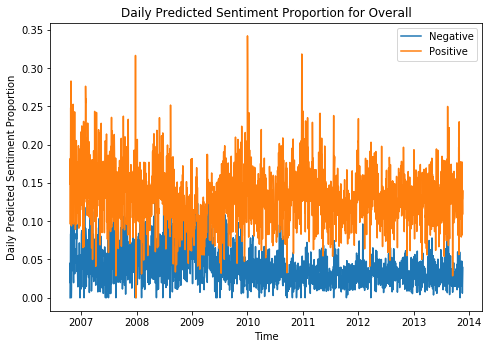

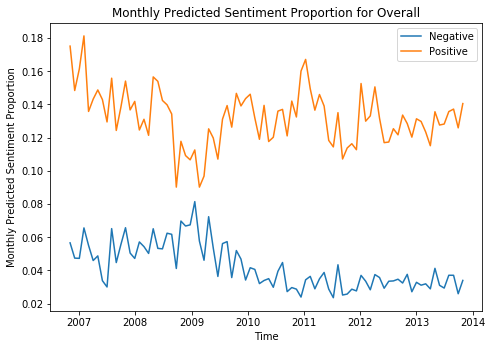

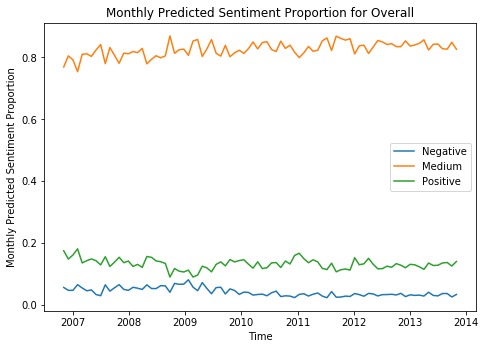

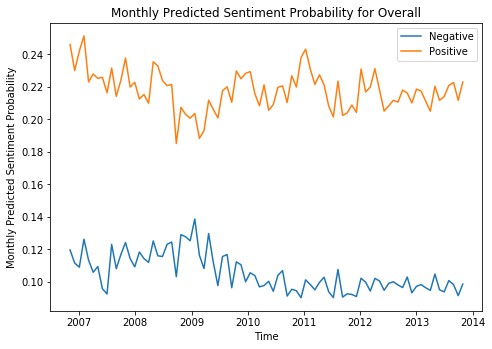

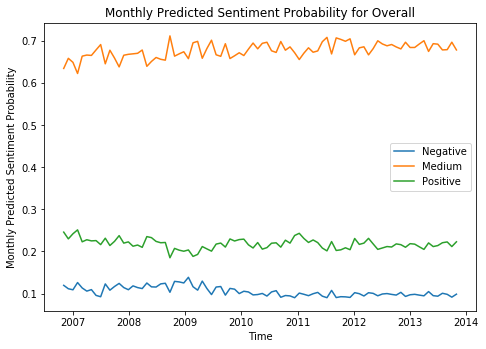

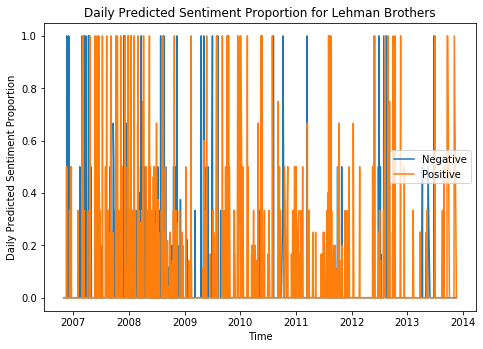

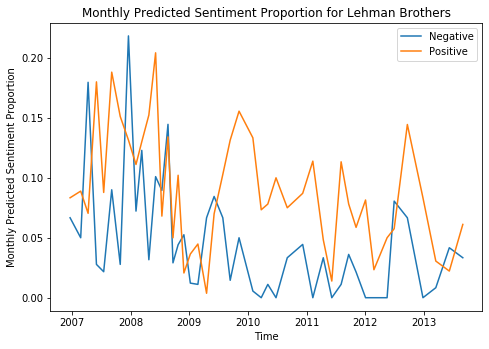

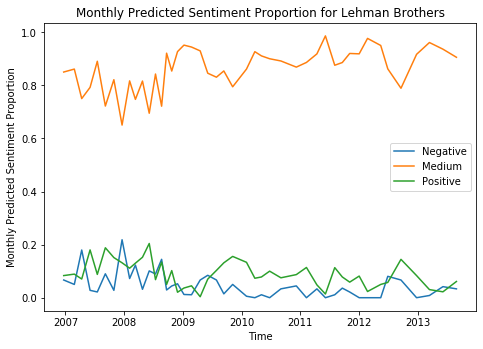

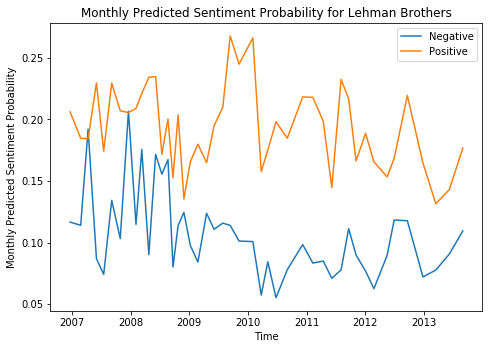

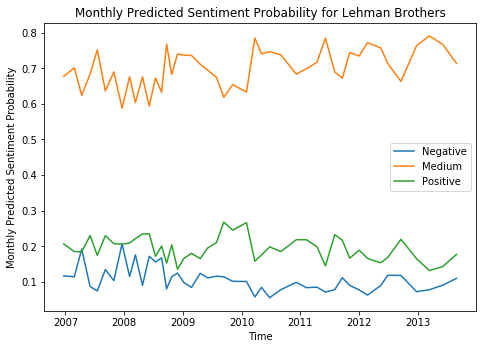

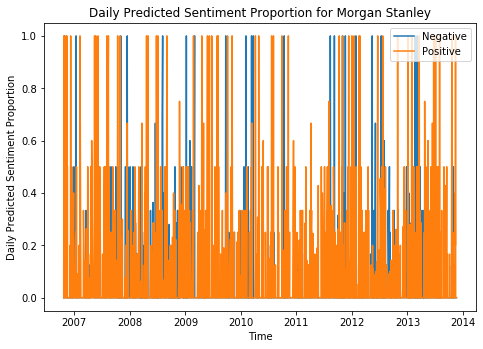

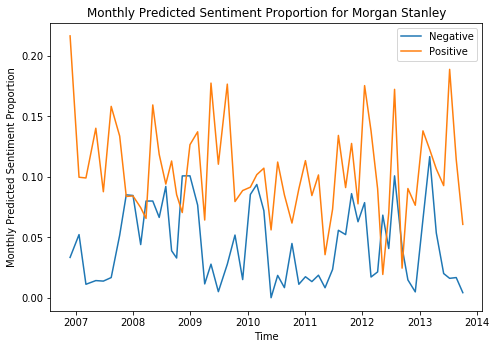

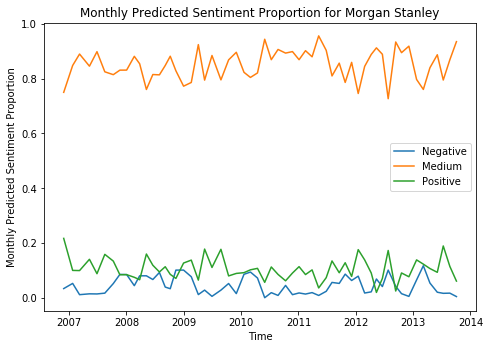

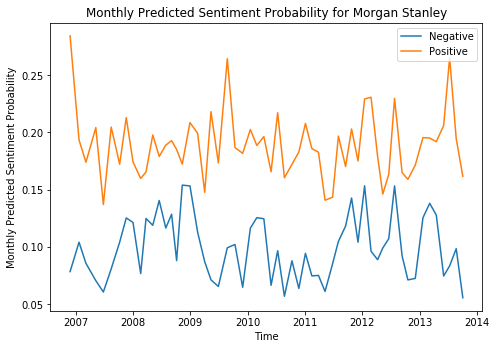

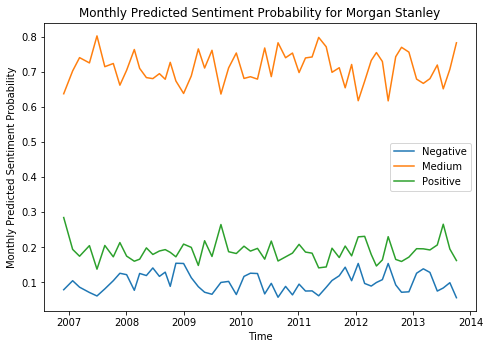

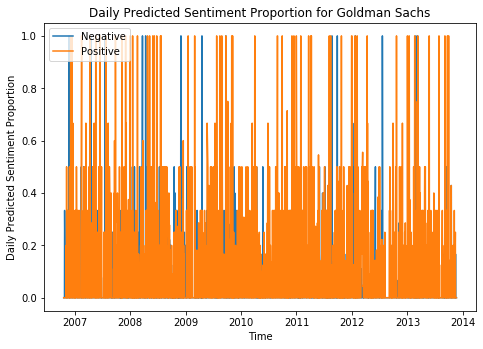

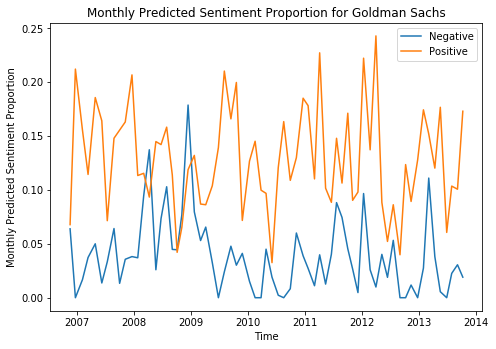

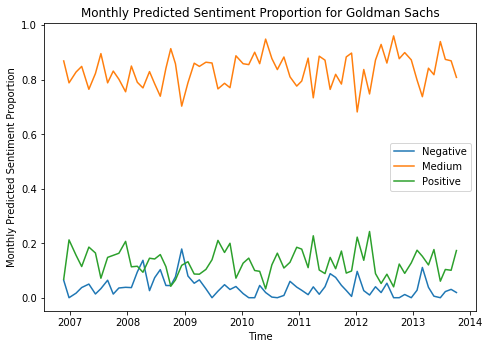

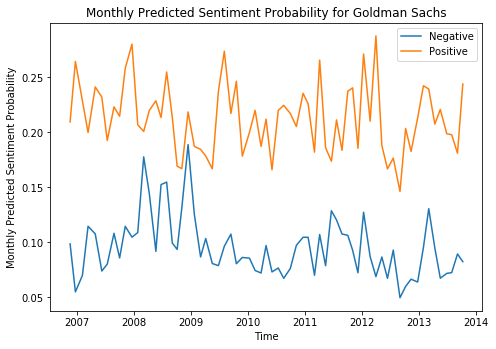

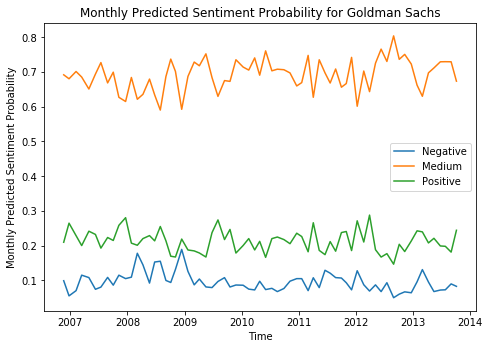

In [132]:
# make 16 plots
overallSentiments = [overallSentimentsNeg, overallSentimentsMed, overallSentimentsPos]
poverallSentimentsq = plotMonthly(overallSentiments, 'Overall')
plehmanBrothersSentimentsq = plotMonthly(lehmanBrothersSentiments, 'Lehman Brothers')
pmorganStanleySentimentsq = plotMonthly(morganStanleySentiments, 'Morgan Stanley')
pgoldmanSachsSentimentsq = plotMonthly(goldmanSachsSentiments, 'Goldman Sachs')

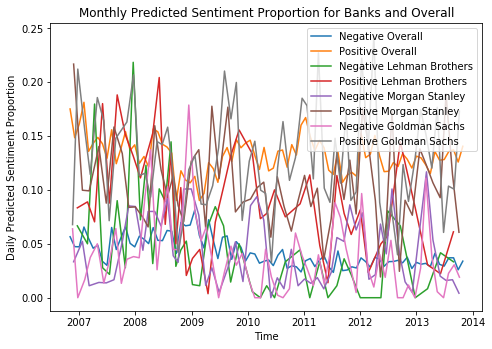

In [133]:
# also plot all three banks and overall together
plt.axes([0, 0.6, 1, 1])
plt.plot(*zip(*poverallSentimentsq[0]), *zip(*poverallSentimentsq[2]))
plt.plot(*zip(*plehmanBrothersSentimentsq[0]), *zip(*plehmanBrothersSentimentsq[2]))
plt.plot(*zip(*pmorganStanleySentimentsq[0]), *zip(*pmorganStanleySentimentsq[2]))
plt.plot(*zip(*pgoldmanSachsSentimentsq[0]), *zip(*pgoldmanSachsSentimentsq[2]))
plt.title('Monthly Predicted Sentiment Proportion for Banks and Overall')
plt.xlabel('Time')
plt.ylabel('Daily Predicted Sentiment Proportion')
plt.legend(['Negative Overall', 'Positive Overall', 
            'Negative Lehman Brothers', 'Positive Lehman Brothers', 
            'Negative Morgan Stanley', 'Positive Morgan Stanley', 
            'Negative Goldman Sachs', 'Positive Goldman Sachs'])
plt.show()

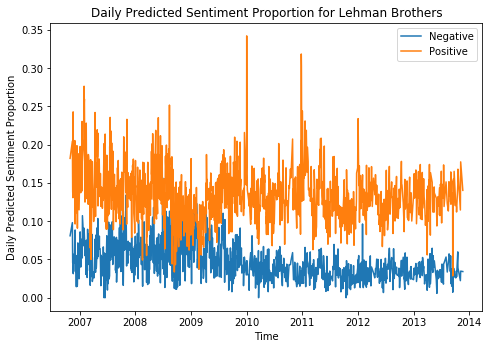

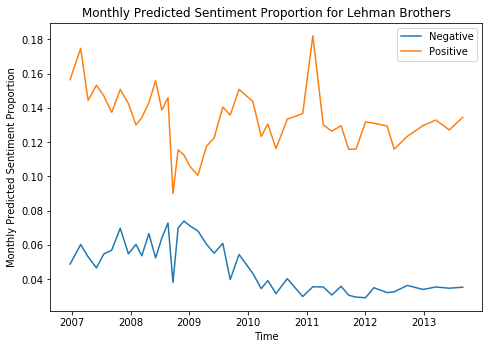

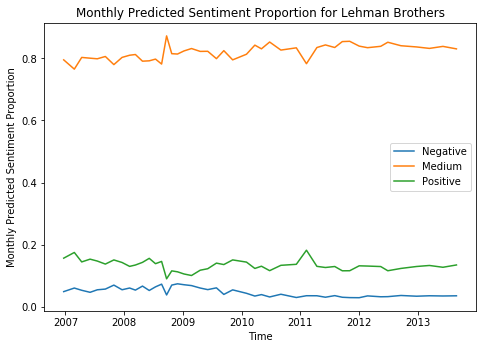

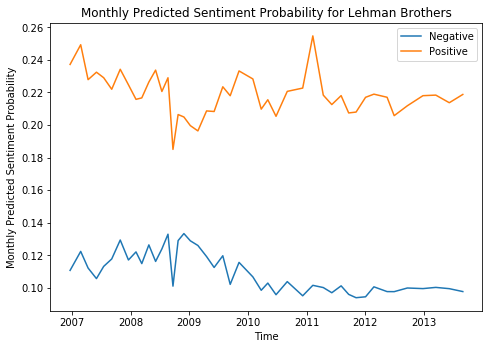

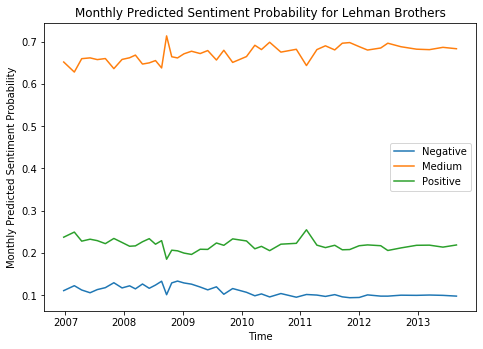

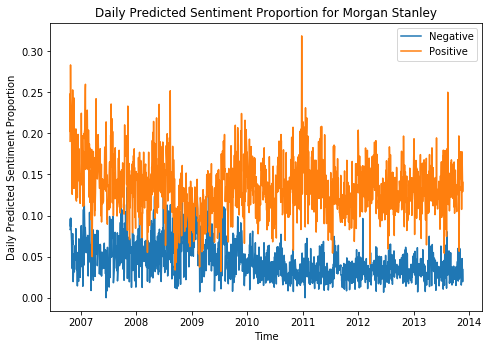

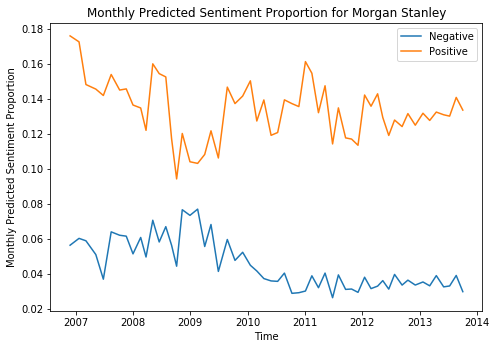

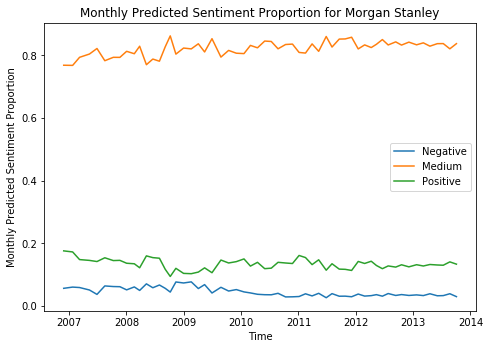

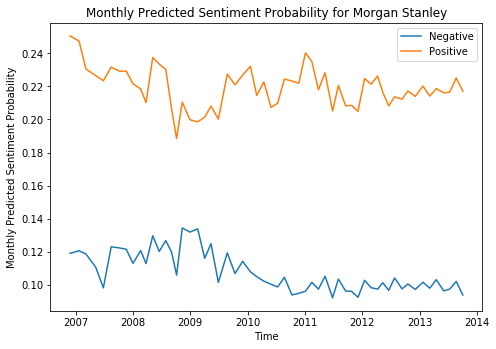

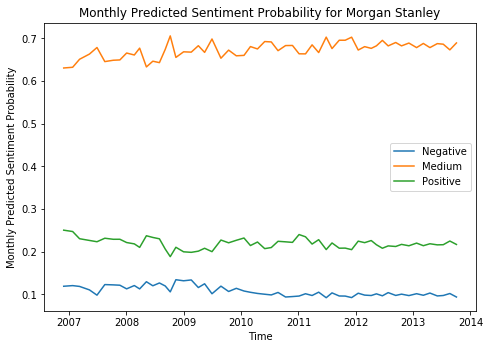

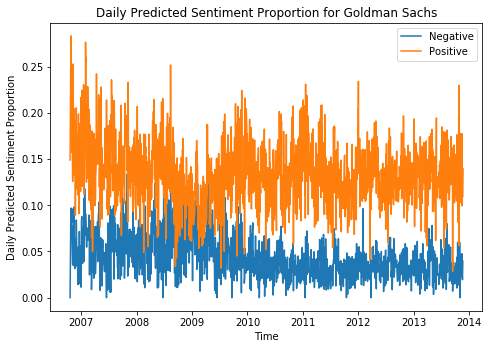

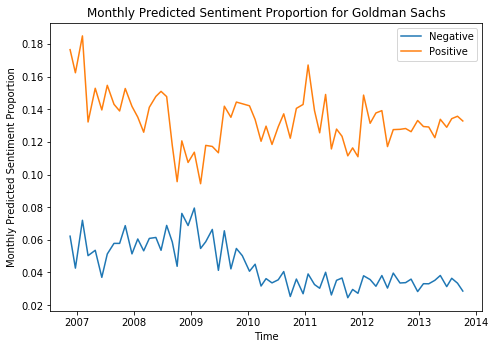

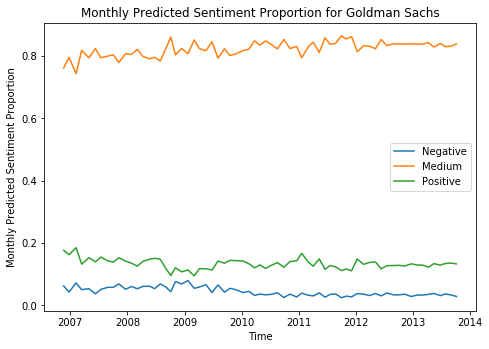

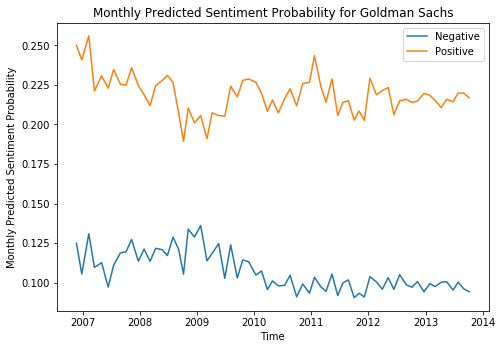

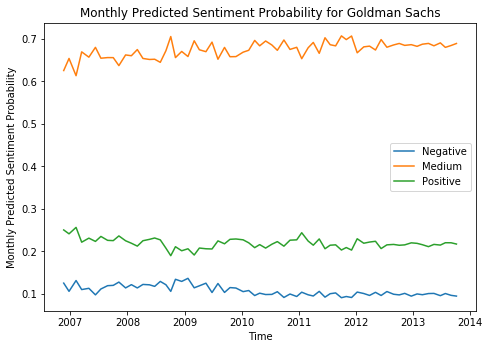

In [134]:
# 'added'
plehmanBrothersSentimentsqByDate = plotMonthly(lehmanBrothersSentimentsByDate, 'Lehman Brothers')
pmorganStanleySentimentsqByDate = plotMonthly(morganStanleySentimentsByDate, 'Morgan Stanley')
pgoldmanSachsSentimentsqByDate = plotMonthly(goldmanSachsSentimentsByDate, 'Goldman Sachs')

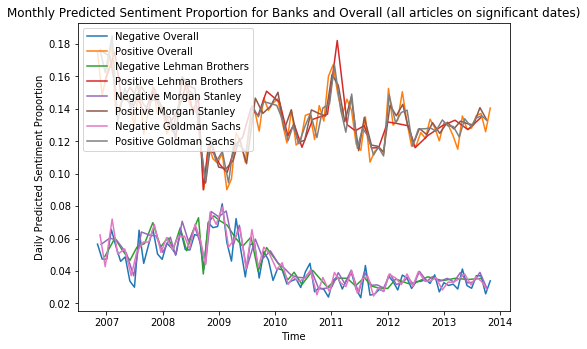

In [135]:
# 'added'
# also plot all three banks and overall together
plt.axes([0, 0.6, 1, 1])
plt.plot(*zip(*poverallSentimentsq[0]), *zip(*poverallSentimentsq[2]))
plt.plot(*zip(*plehmanBrothersSentimentsqByDate[0]), *zip(*plehmanBrothersSentimentsqByDate[2]))
plt.plot(*zip(*pmorganStanleySentimentsqByDate[0]), *zip(*pmorganStanleySentimentsqByDate[2]))
plt.plot(*zip(*pgoldmanSachsSentimentsqByDate[0]), *zip(*pgoldmanSachsSentimentsqByDate[2]))
plt.title('Monthly Predicted Sentiment Proportion for Banks and Overall (all articles on significant dates)')
plt.xlabel('Time')
plt.ylabel('Daily Predicted Sentiment Proportion')
plt.legend(['Negative Overall', 'Positive Overall', 
            'Negative Lehman Brothers', 'Positive Lehman Brothers', 
            'Negative Morgan Stanley', 'Positive Morgan Stanley', 
            'Negative Goldman Sachs', 'Positive Goldman Sachs'])
plt.show()

In [160]:
# 'added'
# flattening lehmanBrothersSentimentsByDateByArticle, etc. so that can plot
import copy

lehmanBrothersSentimentsByDateByArticleFlattened = copy.deepcopy(lehmanBrothersSentimentsByDateByArticle)
morganStanleySentimentsByDateByArticleFlattened = copy.deepcopy(morganStanleySentimentsByDateByArticle)
goldmanSachsSentimentsByDateByArticleFlattened = copy.deepcopy(goldmanSachsSentimentsByDateByArticle)

for senti in range(3):
    for i in range(len(lehmanBrothersSentimentsByDateByArticleFlattened[senti])):
        lehmanBrothersSentimentsByDateByArticleFlattened[senti][i] = (lehmanBrothersSentimentsByDateByArticleFlattened[senti][i][0], flatten(lehmanBrothersSentimentsByDateByArticleFlattened[senti][i][1]))
        
for senti in range(3):
    for i in range(len(morganStanleySentimentsByDateByArticleFlattened[senti])):
        morganStanleySentimentsByDateByArticleFlattened[senti][i] = (morganStanleySentimentsByDateByArticleFlattened[senti][i][0], flatten(morganStanleySentimentsByDateByArticleFlattened[senti][i][1]))
        
for senti in range(3):
    for i in range(len(goldmanSachsSentimentsByDateByArticleFlattened[senti])):
        goldmanSachsSentimentsByDateByArticleFlattened[senti][i] = (goldmanSachsSentimentsByDateByArticleFlattened[senti][i][0], flatten(goldmanSachsSentimentsByDateByArticleFlattened[senti][i][1]))
        

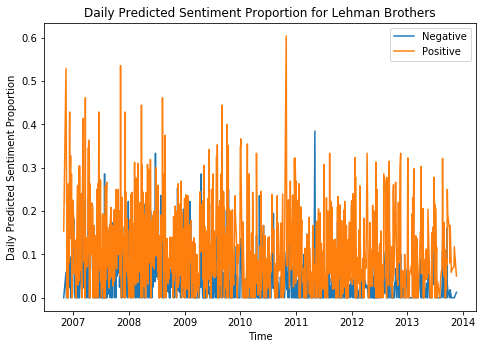

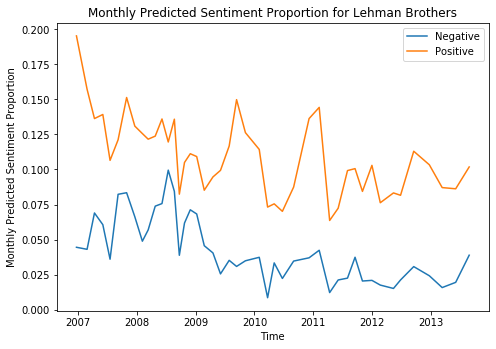

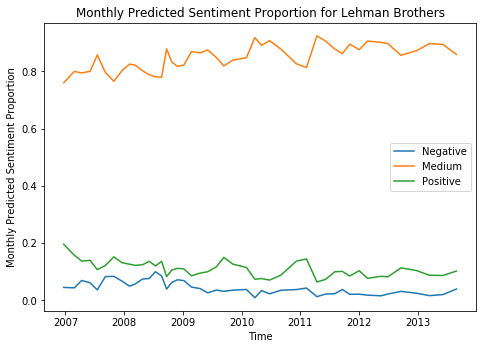

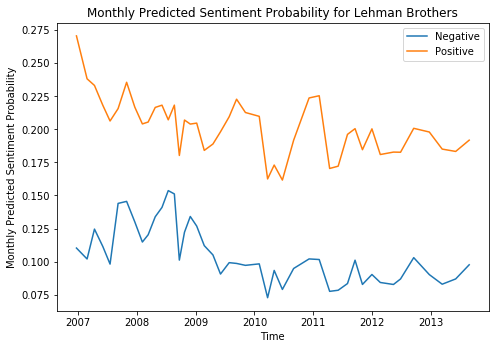

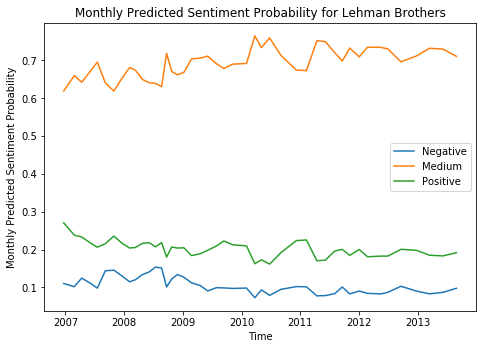

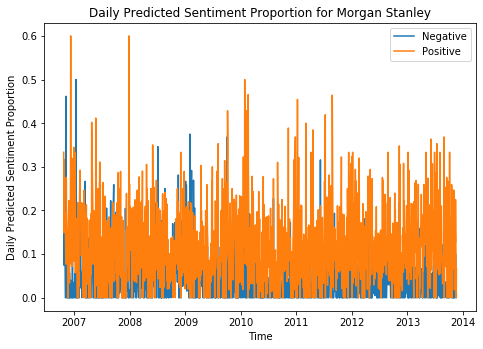

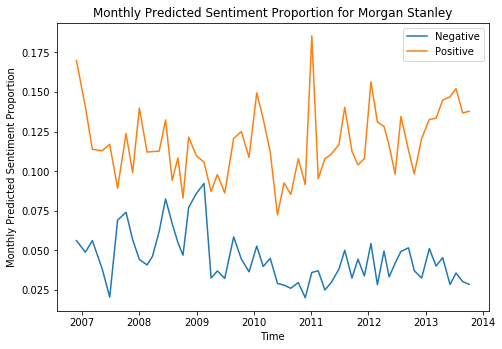

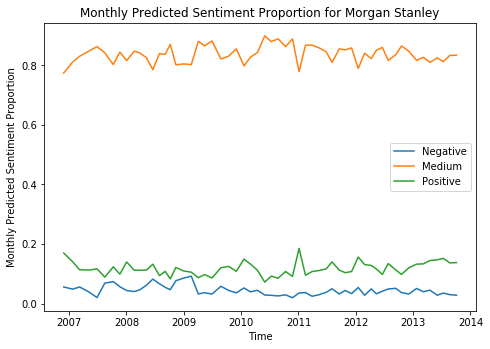

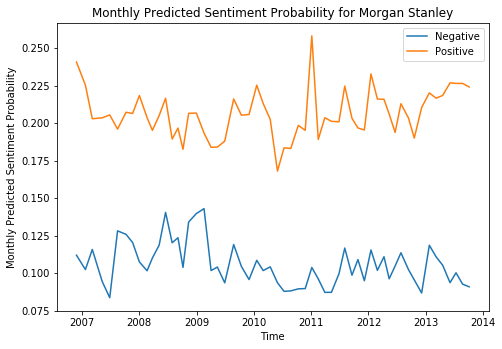

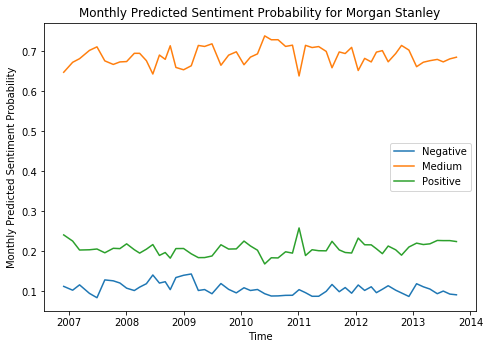

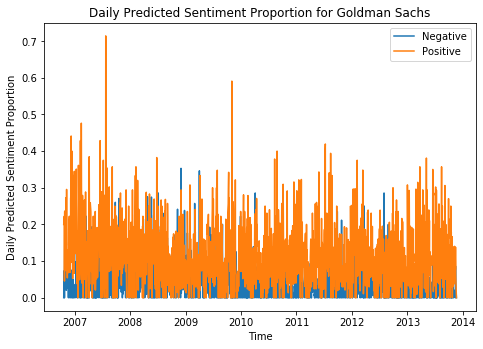

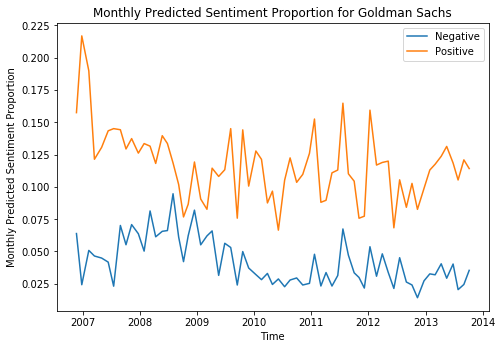

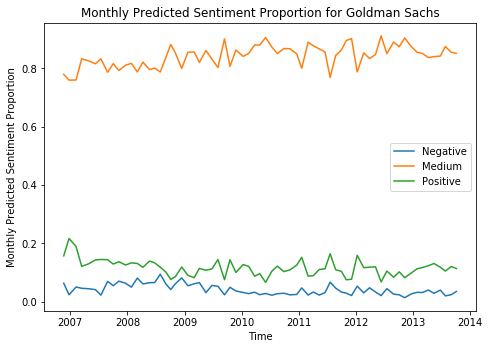

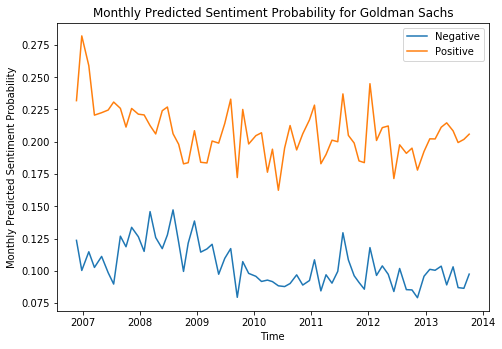

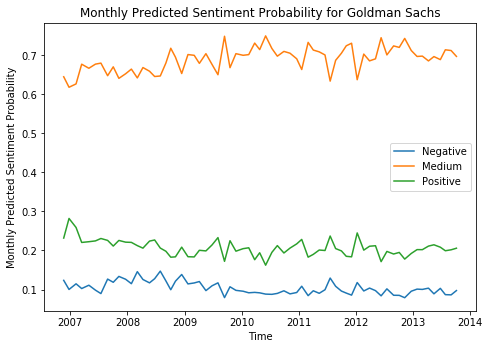

In [163]:
# 'added'
plehmanBrothersSentimentsqByArticle = plotMonthly(lehmanBrothersSentimentsByDateByArticleFlattened, 'Lehman Brothers')
pmorganStanleySentimentsqByArticle = plotMonthly(morganStanleySentimentsByDateByArticleFlattened, 'Morgan Stanley')
pgoldmanSachsSentimentsqByArticle = plotMonthly(goldmanSachsSentimentsByDateByArticleFlattened, 'Goldman Sachs')

In [ ]:
# 'added'
# also plot all three banks and overall together
plt.axes([0, 0.6, 1, 1])
plt.plot(*zip(*poverallSentimentsq[0]), *zip(*poverallSentimentsq[2]))
plt.plot(*zip(*plehmanBrothersSentimentsqByArticle[0]), *zip(*plehmanBrothersSentimentsqByArticle[2]))
plt.plot(*zip(*pmorganStanleySentimentsqByArticle[0]), *zip(*pmorganStanleySentimentsqByArticle[2]))
plt.plot(*zip(*pgoldmanSachsSentimentsqByArticle[0]), *zip(*pgoldmanSachsSentimentsqByArticle[2]))
plt.title('Monthly Predicted Sentiment Proportion for Banks and Overall (all sentences in significant articles)')
plt.xlabel('Time')
plt.ylabel('Daily Predicted Sentiment Proportion')
plt.legend(['Negative Overall', 'Positive Overall', 
            'Negative Lehman Brothers', 'Positive Lehman Brothers', 
            'Negative Morgan Stanley', 'Positive Morgan Stanley', 
            'Negative Goldman Sachs', 'Positive Goldman Sachs'])
plt.show()

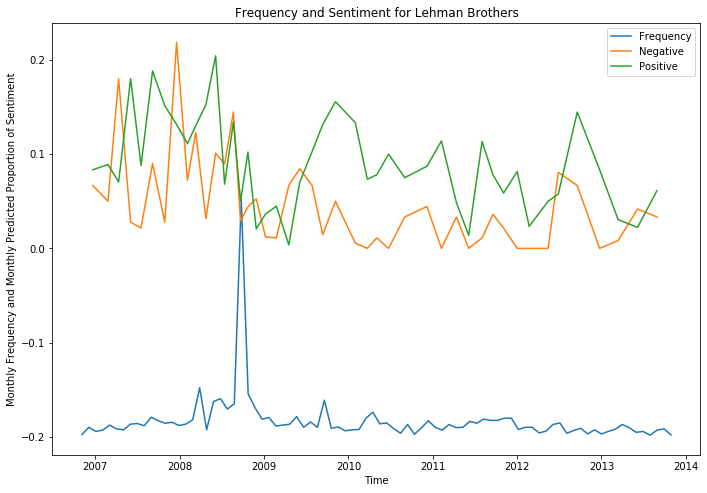

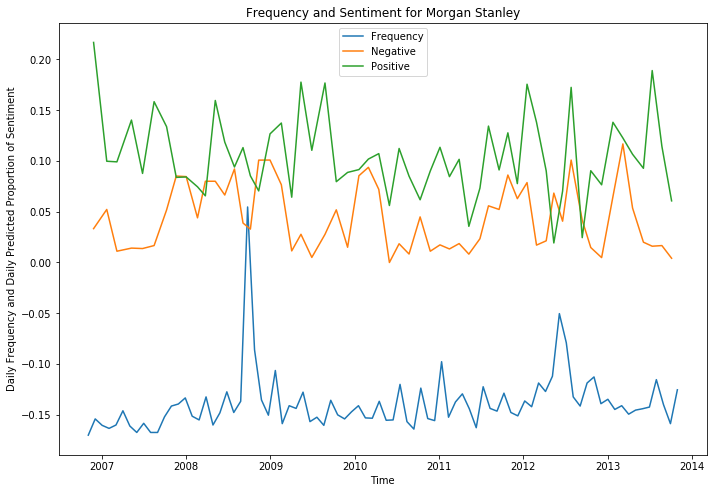

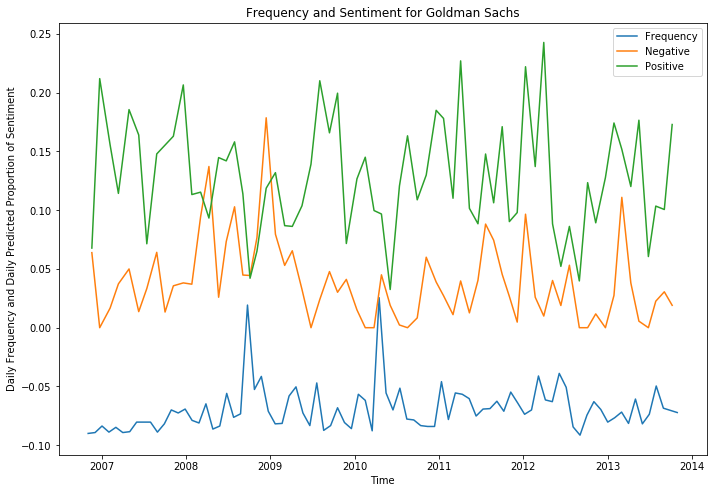

In [129]:
delay=30
center = datetime.timedelta(days=14)
# overlay sentiment on top of frequency data
freq4 = [(elem1, elem2/100-0.2) for elem1, elem2 in freq1]
freqqq4 = movingAvg(freq4, delay, center)
plt.axes([0, 0.6, 1.5, 1.5])
plt.plot(*zip(*freqqq4), *zip(*plehmanBrothersSentimentsq[0]), *zip(*plehmanBrothersSentimentsq[2]))
plt.title('Frequency and Sentiment for Lehman Brothers')
plt.xlabel('Time')
plt.ylabel('Monthly Frequency and Monthly Predicted Proportion of Sentiment')
plt.legend(['Frequency', 'Negative', 'Positive'])
plt.show()
                              
# overlay sentiment on top of frequency data
freq5 = [(elem1, elem2/100-0.18) for elem1, elem2 in freq2]
freqqq5 = movingAvg(freq5, delay, center)
plt.axes([0, 0.6, 1.5, 1.5])
plt.plot(*zip(*freqqq5), *zip(*pmorganStanleySentimentsq[0]), *zip(*pmorganStanleySentimentsq[2]))
plt.title('Frequency and Sentiment for Morgan Stanley')
plt.xlabel('Time')
plt.ylabel('Daily Frequency and Daily Predicted Proportion of Sentiment')
plt.legend(['Frequency', 'Negative',  'Positive'])
plt.show()
                              
# overlay sentiment on top of frequency data
freq6 = [(elem1, elem2/90-0.11) for elem1, elem2 in freq3]
freqqq6 = movingAvg(freq6, delay, center)
plt.axes([0, 0.6, 1.5, 1.5])
plt.plot(*zip(*freqqq6), *zip(*pgoldmanSachsSentimentsq[0]), *zip(*pgoldmanSachsSentimentsq[2]))
plt.title('Frequency and Sentiment for Goldman Sachs')
plt.xlabel('Time')
plt.ylabel('Daily Frequency and Daily Predicted Proportion of Sentiment')
plt.legend(['Frequency', 'Negative', 'Positive'])
plt.show()

In [ ]:
************************************************************************************************************************************************************************

In [ ]:
# no need to run the below code or plots
# i included the below plots just for comparison to the cleaned up version
# this is just a sanity check

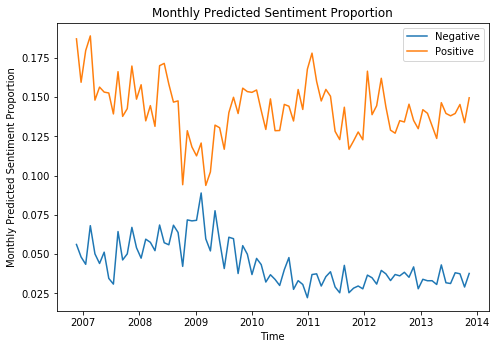

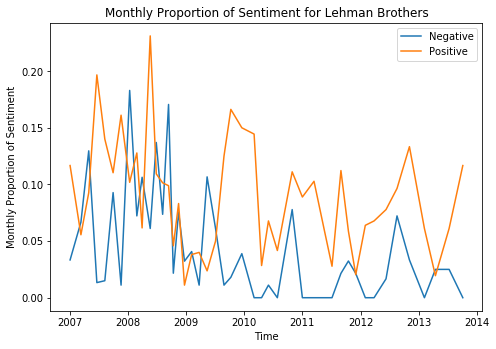

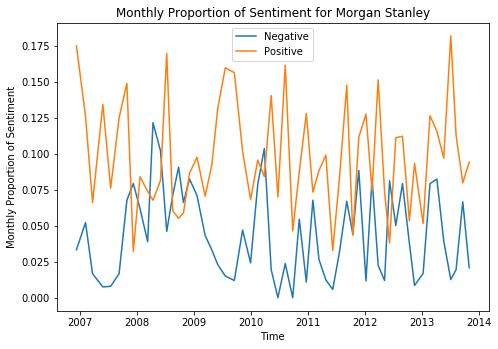

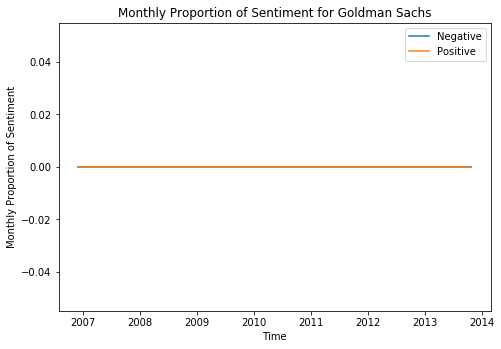

In [236]:
poverallSentimentsNegq = movingAvg(poverallSentimentsNeg, 30)
poverallSentimentsNegq = list(map(convert, poverallSentimentsNegq))

poverallSentimentsMedq = movingAvg(poverallSentimentsMed, 30)
poverallSentimentsMedq = list(map(convert, poverallSentimentsMedq))

poverallSentimentsPosq = movingAvg(poverallSentimentsPos, 30)
poverallSentimentsPosq = list(map(convert, poverallSentimentsPosq))

plt.axes([0, 0.6, 1, 1])
plt.plot(*zip(*poverallSentimentsNegq), *zip(*poverallSentimentsPosq))
plt.title('Monthly Predicted Sentiment Proportion')
plt.xlabel('Time')
plt.ylabel('Monthly Predicted Sentiment Proportion')
plt.legend(['Negative', 'Positive'])
plt.show()

delay=30
plehmanBrothersSentimentsNegq = movingAvg(plehmanBrothersSentimentsNeg, delay)
plehmanBrothersSentimentsNegq = list(map(convert, plehmanBrothersSentimentsNegq))
plehmanBrothersSentimentsMedq = movingAvg(plehmanBrothersSentimentsMed, delay)
plehmanBrothersSentimentsMedq = list(map(convert, plehmanBrothersSentimentsMedq))
plehmanBrothersSentimentsPosq = movingAvg(plehmanBrothersSentimentsPos, delay)
plehmanBrothersSentimentsPosq = list(map(convert, plehmanBrothersSentimentsPosq))
plt.axes([0, 0.6, 1, 1])
plt.plot(*zip(*plehmanBrothersSentimentsNegq))
#plt.plot(*zip(*plehmanBrothersSentimentsMedq))
plt.plot(*zip(*plehmanBrothersSentimentsPosq))
plt.title('Monthly Proportion of Sentiment for Lehman Brothers')
plt.xlabel('Time')
plt.ylabel('Monthly Proportion of Sentiment')
plt.legend(['Negative', 'Positive'])
plt.show()

delay=30
pmorganStanleySentimentsNegq = movingAvg(pmorganStanleySentimentsNeg, delay)
pmorganStanleySentimentsNegq = list(map(convert, pmorganStanleySentimentsNegq))
pmorganStanleySentimentsMedq = movingAvg(pmorganStanleySentimentsMed, delay)
pmorganStanleySentimentsMedq = list(map(convert, pmorganStanleySentimentsMedq))
pmorganStanleySentimentsPosq = movingAvg(pmorganStanleySentimentsPos, delay)
pmorganStanleySentimentsPosq = list(map(convert, pmorganStanleySentimentsPosq))
plt.axes([0, 0.6, 1, 1])
plt.plot(*zip(*pmorganStanleySentimentsNegq))
#plt.plot(*zip(*plehmanBrothersSentimentsMedq))
plt.plot(*zip(*pmorganStanleySentimentsPosq))
plt.title('Monthly Proportion of Sentiment for Morgan Stanley')
plt.xlabel('Time')
plt.ylabel('Monthly Proportion of Sentiment')
plt.legend(['Negative', 'Positive'])
plt.show()

delay=30
pgoldmanSachsSentimentsNegq = movingAvg(pgoldmanSachsSentimentsNeg, delay)
pgoldmanSachsSentimentsNegq = list(map(convert, pgoldmanSachsSentimentsNegq))
pgoldmanSachsSentimentsMedq = movingAvg(pgoldmanSachsSentimentsMed, delay)
pgoldmanSachsSentimentsMedq = list(map(convert, pgoldmanSachsSentimentsMedq))
pgoldmanSachsSentimentsPosq = movingAvg(pgoldmanSachsSentimentsPos, delay)
pgoldmanSachsSentimentsPosq = list(map(convert, pgoldmanSachsSentimentsPosq))
plt.axes([0, 0.6, 1, 1])
plt.plot(*zip(*pgoldmanSachsSentimentsNegq))
#plt.plot(*zip(*plehmanBrothersSentimentsMedq))
plt.plot(*zip(*pgoldmanSachsSentimentsPosq))
plt.title('Monthly Proportion of Sentiment for Goldman Sachs')
plt.xlabel('Time')
plt.ylabel('Monthly Proportion of Sentiment')
plt.legend(['Negative', 'Positive'])
plt.show()

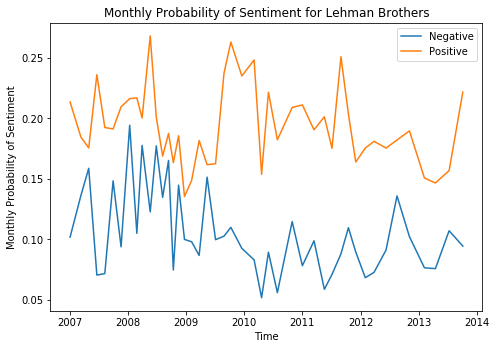

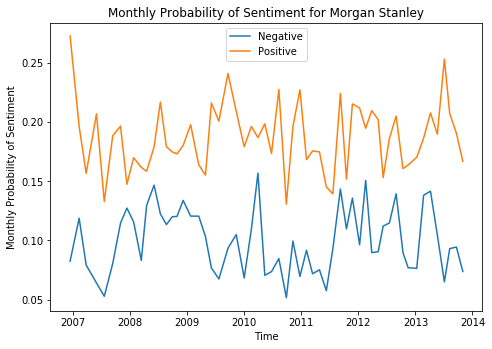

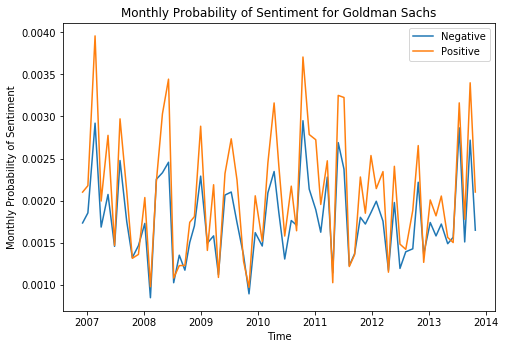

In [257]:
delay=30
lehmanBrothersSentimentsNegq = movingAvg(lehmanBrothersSentimentsNeg, delay)
lehmanBrothersSentimentsNegq = list(map(convert, lehmanBrothersSentimentsNegq))
lehmanBrothersSentimentsMedq = movingAvg(lehmanBrothersSentimentsMed, delay)
lehmanBrothersSentimentsMedq = list(map(convert, lehmanBrothersSentimentsMedq))
lehmanBrothersSentimentsPosq = movingAvg(lehmanBrothersSentimentsPos, delay)
lehmanBrothersSentimentsPosq = list(map(convert, lehmanBrothersSentimentsPosq))
plt.axes([0, 0.6, 1, 1])
plt.plot(*zip(*lehmanBrothersSentimentsNegq))
#plt.plot(*zip(*plehmanBrothersSentimentsMedq))
plt.plot(*zip(*lehmanBrothersSentimentsPosq))
plt.title('Monthly Probability of Sentiment for Lehman Brothers')
plt.xlabel('Time')
plt.ylabel('Monthly Probability of Sentiment')
plt.legend(['Negative', 'Positive'])
plt.show()

delay=30
morganStanleySentimentsNegq = movingAvg(morganStanleySentimentsNeg, delay)
morganStanleySentimentsNegq = list(map(convert, morganStanleySentimentsNegq))
morganStanleySentimentsMedq = movingAvg(morganStanleySentimentsMed, delay)
morganStanleySentimentsMedq = list(map(convert, morganStanleySentimentsMedq))
morganStanleySentimentsPosq = movingAvg(morganStanleySentimentsPos, delay)
morganStanleySentimentsPosq = list(map(convert, morganStanleySentimentsPosq))
plt.axes([0, 0.6, 1, 1])
plt.plot(*zip(*morganStanleySentimentsNegq))
#plt.plot(*zip(*plehmanBrothersSentimentsMedq))
plt.plot(*zip(*morganStanleySentimentsPosq))
plt.title('Monthly Probability of Sentiment for Morgan Stanley')
plt.xlabel('Time')
plt.ylabel('Monthly Probability of Sentiment')
plt.legend(['Negative', 'Positive'])
plt.show()

delay=30
goldmanSachsSentimentsNegq = movingAvg(goldmanSachsSentimentsNeg, delay)
goldmanSachsSentimentsNegq = list(map(convert, goldmanSachsSentimentsNegq))
goldmanSachsSentimentsMedq = movingAvg(goldmanSachsSentimentsMed, delay)
goldmanSachsSentimentsMedq = list(map(convert, goldmanSachsSentimentsMedq))
goldmanSachsSentimentsPosq = movingAvg(goldmanSachsSentimentsPos, delay)
goldmanSachsSentimentsPosq = list(map(convert, goldmanSachsSentimentsPosq))
plt.axes([0, 0.6, 1, 1])
plt.plot(*zip(*goldmanSachsSentimentsNegq))
#plt.plot(*zip(*plehmanBrothersSentimentsMedq))
plt.plot(*zip(*goldmanSachsSentimentsPosq))
plt.title('Monthly Probability of Sentiment for Goldman Sachs')
plt.xlabel('Time')
plt.ylabel('Monthly Probability of Sentiment')
plt.legend(['Negative', 'Positive'])
plt.show()

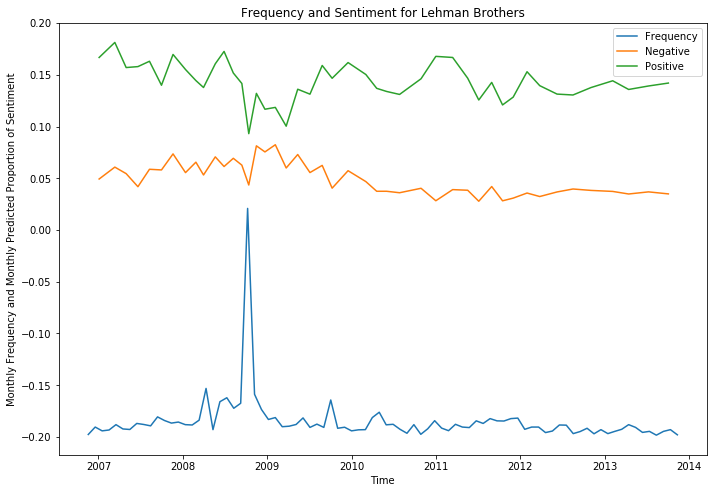

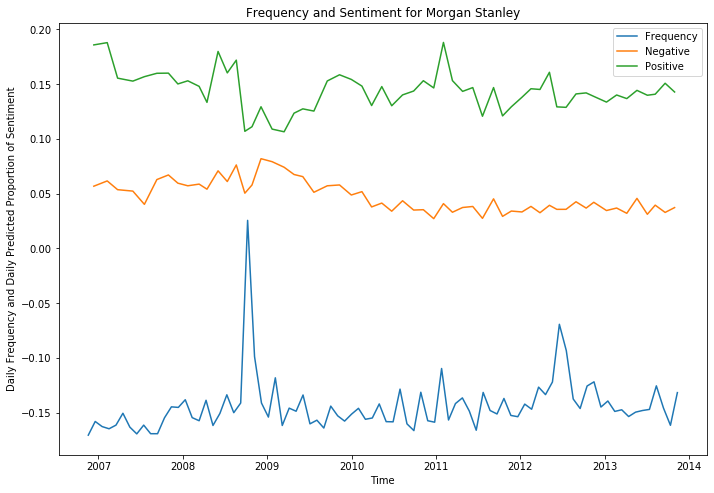

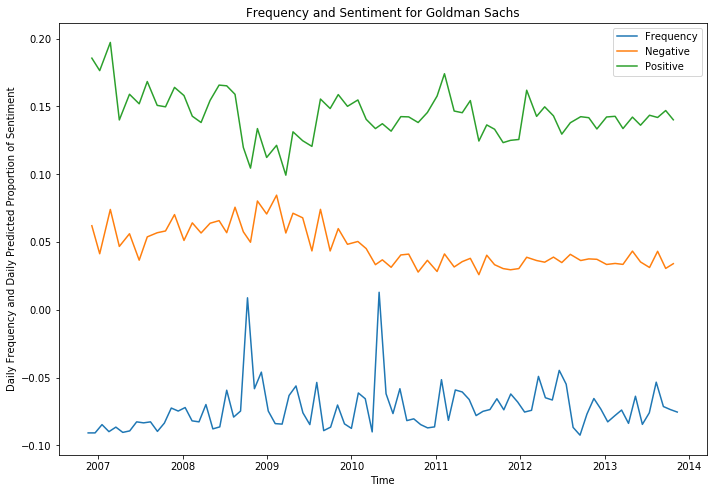

In [197]:
delay=30

# overlay sentiment on top of frequency data
freq4 = [(elem1, elem2/100-0.2) for elem1, elem2 in freq1]
freqqq4 = movingAvg(freq4, delay)
plt.axes([0, 0.6, 1.5, 1.5])
plt.plot(*zip(*freqqq4), *zip(*plehmanBrothersSentimentsq[0]), *zip(*plehmanBrothersSentimentsq[2]))
plt.title('Frequency and Sentiment for Lehman Brothers')
plt.xlabel('Time')
plt.ylabel('Monthly Frequency and Monthly Predicted Proportion of Sentiment')
plt.legend(['Frequency', 'Negative', 'Positive'])
plt.show()
                              
# overlay sentiment on top of frequency data
freq5 = [(elem1, elem2/100-0.18) for elem1, elem2 in freq2]
freqqq5 = movingAvg(freq5, delay)
plt.axes([0, 0.6, 1.5, 1.5])
plt.plot(*zip(*freqqq5), *zip(*pmorganStanleySentimentsq[0]), *zip(*pmorganStanleySentimentsq[2]))
plt.title('Frequency and Sentiment for Morgan Stanley')
plt.xlabel('Time')
plt.ylabel('Daily Frequency and Daily Predicted Proportion of Sentiment')
plt.legend(['Frequency', 'Negative',  'Positive'])
plt.show()
                              
# overlay sentiment on top of frequency data
freq6 = [(elem1, elem2/90-0.11) for elem1, elem2 in freq3]
freqqq6 = movingAvg(freq6, delay)
plt.axes([0, 0.6, 1.5, 1.5])
plt.plot(*zip(*freqqq6), *zip(*pgoldmanSachsSentimentsq[0]), *zip(*pgoldmanSachsSentimentsq[2]))
plt.title('Frequency and Sentiment for Goldman Sachs')
plt.xlabel('Time')
plt.ylabel('Daily Frequency and Daily Predicted Proportion of Sentiment')
plt.legend(['Frequency', 'Negative', 'Positive'])
plt.show()